# **Project Name**    -  Tourism Experience Analytics



##### **Project Type**    - EDA / Regression / Classification / Unsupervised
##### **Contribution**    - Individual/
##### **Team Member 1 -** Predeep Kumar
##### **Team Member 2 -** N.A.
##### **Team Member 3 -** N.A.
##### **Team Member 4 -** N.A.

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.



# **Problem Statement**


Tourism agencies and travel platforms aim to enhance user experiences by leveraging data to provide personalized recommendations, predict user satisfaction, and classify potential user behavior. This project involves analyzing user preferences, travel patterns, and attraction features to achieve three primary objectives: regression, classification, and recommendation.

# ***Let's Begin !***

## **1.Path Configuration & Environment Detection**

### Core Imports

In [ ]:
import os
import sys
from pathlib import Path

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)

plt.style.use("default")

### Environment Detection

In [ ]:
IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
    print("Environment: Google Colab")
else:
    print("Environment: Local / VS Code / Jupyter")

Environment: Google Colab


### COLAB MOUNT + PROJECT ROOT SETUP

In [ ]:
if IN_COLAB:
    print("Mounting Google Drive...")

    from google.colab import drive
    drive.mount('/content/drive')

    # CHANGE THIS PATH BASED ON YOUR DRIVE LOCATION
    PROJECT_ROOT = Path(
        "/content/drive/MyDrive/Tourism-Experience-Analytics"
    )

else:
    print("Detecting local project root...")

    CURRENT_DIR = Path().resolve()
    PROJECT_ROOT = CURRENT_DIR

    # Traverse upward until 'data' folder is found
    while not (PROJECT_ROOT / "data").exists():
        PROJECT_ROOT = PROJECT_ROOT.parent


print("\n✅ Project Root Found At:")
print(PROJECT_ROOT)


Mounting Google Drive...
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

✅ Project Root Found At:
/content/drive/MyDrive/Tourism-Experience-Analytics


### Directory Configuration

In [ ]:

from pathlib import Path

# Data directories
DATA_DIR = PROJECT_ROOT / "data"
RAW_DATA_DIR = DATA_DIR / "raw"
PROCESSED_DATA_DIR = DATA_DIR / "processed"

# Model and report directories
MODELS_DIR = PROJECT_ROOT / "models"
REPORTS_DIR = PROJECT_ROOT / "reports"

# Create directories if they don't exist
RAW_DATA_DIR.mkdir(parents=True, exist_ok=True)
PROCESSED_DATA_DIR.mkdir(parents=True, exist_ok=True)
MODELS_DIR.mkdir(parents=True, exist_ok=True)
REPORTS_DIR.mkdir(parents=True, exist_ok=True)

# Print paths
print("Directories Configured:")
print("Raw Data Directory      :", RAW_DATA_DIR)
print("Processed Data Directory:", PROCESSED_DATA_DIR)
print("Models Directory        :", MODELS_DIR)
print("Reports Directory       :", REPORTS_DIR)
print("✅ All required folders are ready")



Directories Configured:
Raw Data Directory      : /content/drive/MyDrive/Tourism-Experience-Analytics/data/raw
Processed Data Directory: /content/drive/MyDrive/Tourism-Experience-Analytics/data/processed
Models Directory        : /content/drive/MyDrive/Tourism-Experience-Analytics/models
Reports Directory       : /content/drive/MyDrive/Tourism-Experience-Analytics/reports
✅ All required folders are ready


### Check Dataset Avalibility

In [ ]:
print("Checking raw data files:")

files = list(RAW_DATA_DIR.glob("*.xlsx"))

if len(files) == 0:
    print("❌ No Excel files found. Check path!")
else:
    print("✅ Excel files found:")
    for f in files:
        print(" -", f.name)

Checking raw data files:
✅ Excel files found:
 - Region.xlsx
 - User.xlsx
 - Continent.xlsx
 - Mode.xlsx
 - City.xlsx
 - Transaction.xlsx
 - Country.xlsx
 - Type.xlsx
 - Item.xlsx


## **2. Data Loading & Understanding**

### Create Central Data Loader Cell

In [ ]:
# LOAD ALL DATASETS

# File paths
transaction_path = RAW_DATA_DIR / "Transaction.xlsx"
user_path = RAW_DATA_DIR / "User.xlsx"
city_path = RAW_DATA_DIR / "City.xlsx"
country_path = RAW_DATA_DIR / "Country.xlsx"
region_path = RAW_DATA_DIR / "Region.xlsx"
continent_path = RAW_DATA_DIR / "Continent.xlsx"
type_path = RAW_DATA_DIR / "Type.xlsx"
mode_path = RAW_DATA_DIR / "Mode.xlsx"
item_path = RAW_DATA_DIR / "Item.xlsx"

# Load files
transaction_df = pd.read_excel(transaction_path)
user_df = pd.read_excel(user_path)
city_df = pd.read_excel(city_path)
country_df = pd.read_excel(country_path)
region_df = pd.read_excel(region_path)
continent_df = pd.read_excel(continent_path)
type_df = pd.read_excel(type_path)
mode_df = pd.read_excel(mode_path)
item_df = pd.read_excel(item_path)

print("✅ All datasets loaded successfully")

✅ All datasets loaded successfully


### Quick Structural Overview

In [ ]:
# DATASET OVERVIEW

datasets = {
    "Transaction": transaction_df,
    "User": user_df,
    "City": city_df,
    "Country": country_df,
    "Region": region_df,
    "Continent": continent_df,
    "Type": type_df,
    "Mode": mode_df,
    "Item": item_df
}

for name, df in datasets.items():
    print(f"\n{name} Dataset")
    print("-" * 40)
    print(f"Number of Rows    : {df.shape[0]}")
    print(f"Number of Columns : {df.shape[1]}")
    print(f"Shape             : {df.shape}")
    print("Column Names      :", list(df.columns))


Transaction Dataset
----------------------------------------
Number of Rows    : 52930
Number of Columns : 7
Shape             : (52930, 7)
Column Names      : ['TransactionId', 'UserId', 'VisitYear', 'VisitMonth', 'VisitMode', 'AttractionId', 'Rating']

User Dataset
----------------------------------------
Number of Rows    : 33530
Number of Columns : 5
Shape             : (33530, 5)
Column Names      : ['UserId', 'ContinentId', 'RegionId', 'CountryId', 'CityId']

City Dataset
----------------------------------------
Number of Rows    : 9143
Number of Columns : 3
Shape             : (9143, 3)
Column Names      : ['CityId', 'CityName', 'CountryId']

Country Dataset
----------------------------------------
Number of Rows    : 165
Number of Columns : 3
Shape             : (165, 3)
Column Names      : ['CountryId', 'Country', 'RegionId']

Region Dataset
----------------------------------------
Number of Rows    : 22
Number of Columns : 3
Shape             : (22, 3)
Column Names      : ['

### Check Missing Values

In [ ]:
# DATASET-WISE MISSING SUMMARY

missing_summary = []

for name, df in datasets.items():
    for col in df.columns:
        missing_count = df[col].isnull().sum()
        missing_pct = (missing_count / len(df)) * 100

        missing_summary.append([
            name,
            col,
            missing_count,
            round(missing_pct, 2)
        ])

missing_df = pd.DataFrame(
    missing_summary,
    columns=["Dataset", "Column", "Missing_Count", "Missing_Percentage"]
)


dataset_missing_summary = (
    missing_df
    .groupby("Dataset")
    .agg(
        Total_Missing=("Missing_Count", "sum"),
        Avg_Missing_Percentage=("Missing_Percentage", "mean"),
        Columns_With_Missing=("Missing_Count", lambda x: (x > 0).sum())
    )
    .reset_index()
)

display(dataset_missing_summary.sort_values(
    by="Total_Missing",
    ascending=False
))


,Dataset,Total_Missing,Avg_Missing_Percentage,Columns_With_Missing
8,User,4,0.002000,1
0,City,1,0.003333,1
1,Continent,0,0.000000,0
3,Item,0,0.000000,0
2,Country,0,0.000000,0
4,Mode,0,0.000000,0
5,Region,0,0.000000,0
6,Transaction,0,0.000000,0
7,Type,0,0.000000,0


### Check Duplicates

In [ ]:
# DUPLICATE VALUE CHECKING

duplicate_summary = []

for name, df in datasets.items():

    total_rows = len(df)
    dup_count = df.duplicated().sum()
    dup_pct = (dup_count / total_rows) * 100

    duplicate_summary.append([
        name,
        total_rows,
        dup_count,
        round(dup_pct, 2)
    ])

duplicate_df = pd.DataFrame(
    duplicate_summary,
    columns=[
        "Dataset",
        "Total_Rows",
        "Duplicate_Rows",
        "Duplicate_Percentage"
    ]
)

display(duplicate_df.sort_values(
    by="Duplicate_Rows",
    ascending=False
))


,Dataset,Total_Rows,Duplicate_Rows,Duplicate_Percentage
0,Transaction,52930,0,0.0
1,User,33530,0,0.0
2,City,9143,0,0.0
3,Country,165,0,0.0
4,Region,22,0,0.0
5,Continent,6,0,0.0
6,Type,17,0,0.0
7,Mode,6,0,0.0
8,Item,1698,0,0.0


### DATA PREVIEW (Structured View)



In [ ]:
for name, df in datasets.items():

    print(f"\n{name} Dataset Preview")
    print("-" * 50)

    display(df.head(5))


Transaction Dataset Preview
--------------------------------------------------


,TransactionId,UserId,VisitYear,VisitMonth,VisitMode,AttractionId,Rating
0,3,70456,2022,10,2,640,5
1,8,7567,2022,10,4,640,5
2,9,79069,2022,10,3,640,5
3,10,31019,2022,10,3,640,3
4,15,43611,2022,10,2,640,3



User Dataset Preview
--------------------------------------------------


,UserId,ContinentId,RegionId,CountryId,CityId
0,14,5,20,155,220.0
1,16,3,14,101,3098.0
2,20,4,15,109,4303.0
3,23,1,4,22,154.0
4,25,3,14,101,3098.0



City Dataset Preview
--------------------------------------------------


,CityId,CityName,CountryId
0,0,-,0
1,1,Douala,1
2,2,South Region,1
3,3,N'Djamena,2
4,4,Kigali,3



Country Dataset Preview
--------------------------------------------------


,CountryId,Country,RegionId
0,0,-,0
1,1,Cameroon,1
2,2,Chad,1
3,3,Rwanda,1
4,4,Ethiopia,2



Region Dataset Preview
--------------------------------------------------


,Region,RegionId,ContinentId
0,-,0,0
1,Central Africa,1,1
2,East Africa,2,1
3,North Africa,3,1
4,Southern Africa,4,1



Continent Dataset Preview
--------------------------------------------------


,ContinentId,Continent
0,0,-
1,1,Africa
2,2,America
3,3,Asia
4,4,Australia & Oceania



Type Dataset Preview
--------------------------------------------------


,AttractionTypeId,AttractionType
0,2,Ancient Ruins
1,10,Ballets
2,13,Beaches
3,19,Caverns & Caves
4,34,Flea & Street Markets



Mode Dataset Preview
--------------------------------------------------


,VisitModeId,VisitMode
0,0,-
1,1,Business
2,2,Couples
3,3,Family
4,4,Friends



Item Dataset Preview
--------------------------------------------------


,AttractionId,AttractionCityId,AttractionTypeId,Attraction,AttractionAddress
0,369,1,13,Kuta Beach - Bali,Kuta
1,481,1,13,Nusa Dua Beach,"Semenanjung Nusa Dua, Nusa Dua 80517 Indonesia"
2,640,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia"
3,650,1,13,Sanur Beach,Sanur
4,673,1,13,Seminyak Beach,Seminyak


### Dataset Describe (Statistical Summary)

In [ ]:
# DATASET DESCRIBE (NUMERICAL SUMMARY)

for name, df in datasets.items():

    print(f"\n{name} Dataset Description")
    print("-" * 50)

    display(df.describe(include="all"))


Transaction Dataset Description
--------------------------------------------------


,TransactionId,UserId,VisitYear,VisitMonth,VisitMode,AttractionId,Rating
count,52930.000000,52930.000000,52930.000000,52930.000000,52930.000000,52930.000000,52930.000000
mean,70415.130474,45024.522596,2016.351899,6.633100,2.945759,759.663782,4.157699
std,66299.514206,25073.062199,1.732926,3.392979,1.000683,210.716111,0.970543
min,3.000000,14.000000,2013.000000,1.000000,1.000000,369.000000,1.000000
25%,19646.250000,23470.000000,2015.000000,4.000000,2.000000,640.000000,4.000000
50%,42770.500000,45533.500000,2016.000000,7.000000,3.000000,737.000000,4.000000
75%,105638.750000,66667.000000,2018.000000,9.000000,4.000000,841.000000,5.000000
max,211241.000000,88190.000000,2022.000000,12.000000,5.000000,1297.000000,5.000000



User Dataset Description
--------------------------------------------------


,UserId,ContinentId,RegionId,CountryId,CityId
count,33530.000000,33530.000000,33530.000000,33530.000000,33526.000000
mean,45112.842231,3.601044,14.534864,106.360871,3409.146841
std,24904.878706,1.066745,4.148320,35.392048,2313.002950
min,14.000000,1.000000,0.000000,1.000000,1.000000
25%,23825.250000,3.000000,13.000000,93.000000,1434.000000
50%,45556.500000,4.000000,15.000000,109.000000,3206.000000
75%,66636.250000,4.000000,16.000000,115.000000,4940.000000
max,88190.000000,5.000000,21.000000,164.000000,9142.000000



City Dataset Description
--------------------------------------------------


,CityId,CityName,CountryId
count,9143.000000,9142,9143.000000
unique,NaN,8767,NaN
top,NaN,-,NaN
freq,NaN,8,NaN
mean,4571.000000,NaN,107.776878
std,2639.501089,NaN,42.466496
min,0.000000,NaN,0.000000
25%,2285.500000,NaN,69.000000
50%,4571.000000,NaN,109.000000
75%,6856.500000,NaN,151.000000



Country Dataset Description
--------------------------------------------------


,CountryId,Country,RegionId
count,165.000000,165,165.000000
unique,NaN,164,NaN
top,NaN,Cyprus,NaN
freq,NaN,2,NaN
mean,82.000000,NaN,11.430303
std,47.775517,NaN,5.905996
min,0.000000,NaN,0.000000
25%,41.000000,NaN,6.000000
50%,82.000000,NaN,12.000000
75%,123.000000,NaN,17.000000



Region Dataset Description
--------------------------------------------------


,Region,RegionId,ContinentId
count,22,22.000000,22.000000
unique,22,NaN,NaN
top,-,NaN,NaN
freq,1,NaN,NaN
mean,NaN,10.500000,2.772727
std,NaN,6.493587,1.601541
min,NaN,0.000000,0.000000
25%,NaN,5.250000,1.250000
50%,NaN,10.500000,3.000000
75%,NaN,15.750000,4.000000



Continent Dataset Description
--------------------------------------------------


,ContinentId,Continent
count,6.000000,6
unique,NaN,6
top,NaN,-
freq,NaN,1
mean,2.500000,NaN
std,1.870829,NaN
min,0.000000,NaN
25%,1.250000,NaN
50%,2.500000,NaN
75%,3.750000,NaN



Type Dataset Description
--------------------------------------------------


,AttractionTypeId,AttractionType
count,17.000000,17
unique,NaN,17
top,NaN,Ancient Ruins
freq,NaN,1
mean,55.588235,NaN
std,30.761296,NaN
min,2.000000,NaN
25%,34.000000,NaN
50%,63.000000,NaN
75%,82.000000,NaN



Mode Dataset Description
--------------------------------------------------


,VisitModeId,VisitMode
count,6.000000,6
unique,NaN,6
top,NaN,-
freq,NaN,1
mean,2.500000,NaN
std,1.870829,NaN
min,0.000000,NaN
25%,1.250000,NaN
50%,2.500000,NaN
75%,3.750000,NaN



Item Dataset Description
--------------------------------------------------


,AttractionId,AttractionCityId,AttractionTypeId,Attraction,AttractionAddress
count,1698.000000,1698.000000,1698,1698,1698
unique,NaN,NaN,22,1564,442
top,NaN,NaN,Museum,Flea Market - Cavan,Yogyakarta
freq,NaN,NaN,367,3,5
mean,2110.382803,3249.585395,NaN,NaN,NaN
std,503.696506,2576.932216,NaN,NaN,NaN
min,369.000000,0.000000,NaN,NaN,NaN
25%,1692.250000,287.000000,NaN,NaN,NaN
50%,2116.500000,2576.000000,NaN,NaN,NaN
75%,2540.750000,6037.000000,NaN,NaN,NaN


### CHECK DATA TYPE MIX IN AttractionTypeId


In [ ]:
# Convert values to string first
col_data = item_df["AttractionTypeId"].astype(str)


# Check numeric values
numeric_count = col_data.str.isnumeric().sum()

# Check non-numeric (categorical) values
categorical_count = (~col_data.str.isnumeric()).sum()


print("AttractionTypeId Column Analysis")
print("--------------------------------")
print("Total Values      :", len(col_data))
print("Numeric Values    :", numeric_count)
print("Categorical Values:", categorical_count)


# Show sample categorical values
if categorical_count > 0:
    print("\nSample Categorical Values:")
    display(item_df.loc[
        ~col_data.str.isnumeric(),
        "AttractionTypeId"
    ].unique()[:10])


AttractionTypeId Column Analysis
--------------------------------
Total Values      : 1698
Numeric Values    : 30
Categorical Values: 1668

Sample Categorical Values:


array(['Temple', 'Beach', 'Park', 'Museum', 'Market'], dtype=object)

In [ ]:
unique_summary = []

for name, df in datasets.items():

    for col in df.columns:
        unique_count = df[col].nunique()

        unique_summary.append([
            name,
            col,
            unique_count
        ])

unique_df = pd.DataFrame(
    unique_summary,
    columns=["Dataset", "Column", "Unique_Values_Count"]
)

display(unique_df.sort_index())

,Dataset,Column,Unique_Values_Count
0,Transaction,TransactionId,52930
1,Transaction,UserId,33530
2,Transaction,VisitYear,10
3,Transaction,VisitMonth,12
4,Transaction,VisitMode,5
5,Transaction,AttractionId,30
6,Transaction,Rating,5
7,User,UserId,33530
8,User,ContinentId,5
9,User,RegionId,22


### Variables Description

Answer Here

### Check Unique Values (Categorical Understanding)

### What did you know about your dataset?

- The dataset contains 9 related tables about transactions, users, locations, attractions, and visit modes.

- The Transaction dataset is the largest with 52,930 records, showing user visits, ratings, and time information.

- User data contains 33,530 users, linked to continent, region, country, and city.

- The dataset covers visits from 2013 to 2022 and all 12 months, showing good time coverage.

- Ratings are given on a 1 to 5 scale, with an average rating of about 4.15, indicating mostly positive reviews.

- There are 6 visit modes, 17 attraction types, and 30 attractions in the dataset.

- The location hierarchy includes 6 continents, 22 regions, 165 countries, and 9,143 cities.

- Most columns are numeric IDs, while names such as city, country, and attraction are categorical.

- Only very few missing values are present, and there are no duplicate records.

- The dataset has both low-cardinality features (VisitMode, Rating, Continent) and high-cardinality features (UserId, CityName, CityId).
- Some location fields contain a “-” value in the city, country, and continent files, which represents unknown or invalid data and will be handled after merging all datasets.

- From data analysis, it was observed that in other reference datasets, the AttractionTypeId field contains only numerical values. However, the updated item.xlsx file includes both numerical IDs and categorical names in the same column. Since only numerical IDs are valid for integration and merging, the categorical values are not useful in this context and must be removed to standardize the data before integration.

- Overall, the data is well-structured, complete, and suitable for regression, classification, and recommendation tasks.

## **3. Data Cleaning & Integration**

### Handle Missing Values

In [ ]:
# Fill missing CityId in User table

if "CityId" in user_df.columns:
    user_df["CityId"] = user_df["CityId"].fillna(
        user_df["CityId"].mode()[0]
    )


# Fill missing CityName

if "CityName" in city_df.columns:
    city_df["CityName"] = city_df["CityName"].fillna("Unknown")


# Drop rows with missing Rating

transaction_df = transaction_df.dropna(subset=["Rating"])


print("✅ Missing values handled")

✅ Missing values handled


### Fix Data Types

In [ ]:
# Fix Transaction types

transaction_df["VisitYear"] = transaction_df["VisitYear"].astype(int)
transaction_df["VisitMonth"] = transaction_df["VisitMonth"].astype(int)
transaction_df["Rating"] = transaction_df["Rating"].astype(float)


# Convert ID columns safely

id_cols = [
    "TransactionId", "UserId", "AttractionId",
    "CityId", "CountryId", "RegionId", "ContinentId"
]

for col in id_cols:

    for df in [transaction_df, user_df, city_df,
               country_df, region_df, continent_df, item_df]:

        if col in df.columns:
            df[col] = df[col].astype(int)


print("✅ Data types fixed")

✅ Data types fixed


### Remove Duplicates

In [ ]:
# Remove duplicates from each dataset

for name, df in {
    "Transaction": transaction_df,
    "User": user_df,
    "City": city_df,
    "Country": country_df,
    "Region": region_df,
    "Continent": continent_df,
    "Type": type_df,
    "Mode": mode_df,
    "Item": item_df
}.items():

    before = len(df)
    df.drop_duplicates(inplace=True)
    after = len(df)

    print(f"✅ {name}: {before - after} duplicates removed")


✅ Transaction: 0 duplicates removed
✅ User: 0 duplicates removed
✅ City: 0 duplicates removed
✅ Country: 0 duplicates removed
✅ Region: 0 duplicates removed
✅ Continent: 0 duplicates removed
✅ Type: 0 duplicates removed
✅ Mode: 0 duplicates removed
✅ Item: 0 duplicates removed


### Validate Foreign Keys

In [ ]:
# Validate UserId

if "UserId" in transaction_df.columns:

    transaction_df = transaction_df[
        transaction_df["UserId"].isin(user_df["UserId"])
    ]


# Validate AttractionId

if "AttractionId" in transaction_df.columns:

    transaction_df = transaction_df[
        transaction_df["AttractionId"].isin(item_df["AttractionId"])
    ]


print("✅ ID validation completed")


✅ ID validation completed


### Handle Outliers and Invalid Values

In [ ]:
# Filter valid rating

transaction_df = transaction_df[
    transaction_df["Rating"].between(1, 5)
]


# Filter valid month

transaction_df = transaction_df[
    transaction_df["VisitMonth"].between(1, 12)
]


# Filter valid year

transaction_df = transaction_df[
    transaction_df["VisitYear"].between(2013, 2025)
]


print("✅ Outliers handled")


✅ Outliers handled


### Cleaning Mixed AttractionTypeId Column

In [ ]:
# Convert to string for checking
item_df["AttractionTypeId"] = item_df["AttractionTypeId"].astype(str)


# Identify numeric values
is_numeric = item_df["AttractionTypeId"].str.isnumeric()


# Count before cleaning
total_rows = len(item_df)
numeric_rows = is_numeric.sum()
categorical_rows = (~is_numeric).sum()


print("Before Cleaning")
print("--------------")
print("Total Rows      :", total_rows)
print("Numeric Values  :", numeric_rows)
print("Text Values     :", categorical_rows)


# Keep only rows with numeric IDs
item_df_clean = item_df[is_numeric].copy()


# Convert back to integer
item_df_clean["AttractionTypeId"] = (
    item_df_clean["AttractionTypeId"].astype(int)
)


# Replace original dataframe
item_df = item_df_clean.reset_index(drop=True)


print("\nAfter Cleaning")
print("-------------")
print("Rows Remaining :", len(item_df))
print("Invalid Rows Removed:", categorical_rows)
print("AttractionTypeId standardized")

Before Cleaning
--------------
Total Rows      : 1698
Numeric Values  : 30
Text Values     : 1668

After Cleaning
-------------
Rows Remaining : 30
Invalid Rows Removed: 1668
AttractionTypeId standardized


### Standardize Text Columns

In [ ]:
# Function to clean text

def clean_text(col):
    return col.astype(str).str.strip().str.title()


# Apply to text columns

city_df["CityName"] = clean_text(city_df["CityName"])
country_df["Country"] = clean_text(country_df["Country"])
region_df["Region"] = clean_text(region_df["Region"])
continent_df["Continent"] = clean_text(continent_df["Continent"])
type_df["AttractionType"] = clean_text(type_df["AttractionType"])
mode_df["VisitMode"] = clean_text(mode_df["VisitMode"])


print("✅ Text standardized")

✅ Text standardized


### Merge All Datasets

In [ ]:
# MASTER DATASET MERGING PIPELINE



#  Merge Transaction with User to add user-level attributes

master_df = transaction_df.merge(
    user_df,
    on="UserId",
    how="left",
    suffixes=("", "_user")
)


#  Merge with City to obtain city and country information

master_df = master_df.merge(
    city_df,
    on="CityId",
    how="left",
    suffixes=("", "_city")
)


# Select CountryId derived from City mapping

if "CountryId_city" in master_df.columns:
    master_df["CountryId"] = master_df["CountryId_city"]


# Remove duplicate CountryId columns

for col in ["CountryId_user", "CountryId_city"]:
    if col in master_df.columns:
        master_df.drop(col, axis=1, inplace=True)


#  Merge with Country to obtain regional information

master_df = master_df.merge(
    country_df,
    on="CountryId",
    how="left",
    suffixes=("", "_country")
)


# Select RegionId derived from Country mapping

if "RegionId_country" in master_df.columns:
    master_df["RegionId"] = master_df["RegionId_country"]


# Remove duplicate RegionId columns

for col in ["RegionId_user", "RegionId_country"]:
    if col in master_df.columns:
        master_df.drop(col, axis=1, inplace=True)


# Step 4: Merge with Region to obtain continent information

master_df = master_df.merge(
    region_df,
    on="RegionId",
    how="left",
    suffixes=("", "_region")
)


# Select ContinentId derived from Region mapping

if "ContinentId_region" in master_df.columns:
    master_df["ContinentId"] = master_df["ContinentId_region"]


# Remove duplicate ContinentId columns

for col in ["ContinentId_user", "ContinentId_region"]:
    if col in master_df.columns:
        master_df.drop(col, axis=1, inplace=True)


# Merge with Continent to add continent names

master_df = master_df.merge(
    continent_df,
    on="ContinentId",
    how="left"
)


# Merge with Item to add attraction details

master_df = master_df.merge(
    item_df,
    on="AttractionId",
    how="left"
)


# Merge with Type to add attraction category information

master_df = master_df.merge(
    type_df,
    on="AttractionTypeId",
    how="left"
)


# Merge with Mode to add visit mode information

master_df = master_df.merge(
    mode_df,
    left_on="VisitMode",
    right_on="VisitModeId",
    how="left"
)


print("All datasets merged successfully")


All datasets merged successfully


### Post-Merge Cleaning

In [ ]:
# Remove duplicated columns created during merging

master_df = master_df.loc[:, ~master_df.columns.duplicated()]


# Remove duplicate rows

master_df.drop_duplicates(inplace=True)


# Remove duplicate VisitMode_x column

if "VisitMode_x" in master_df.columns:

    master_df.drop("VisitMode_x", axis=1, inplace=True)


# Rename VisitMode_y to VisitMode

if "VisitMode_y" in master_df.columns:

    master_df.rename(
        columns={"VisitMode_y": "VisitMode"},
        inplace=True
    )


print("Post-merge cleaning completed")


Post-merge cleaning completed


### Check Rows Containing “-” (Before Removing)

In [ ]:
# Columns where "-" may appear
location_cols = ["CityName", "Country", "Region", "Continent"]

# Create mask for rows containing "-"
mask = False

for col in location_cols:

    if col in master_df.columns:
        mask = mask | (master_df[col] == "-")


# Count affected rows
rows_with_dash = mask.sum()


print("Total Rows:", len(master_df))
print("Rows containing '-':", rows_with_dash)
print("Percentage affected:", round((rows_with_dash / len(master_df)) * 100, 3), "%")


# Preview some affected rows
if rows_with_dash > 0:
    print("\nSample rows with '-':")
    display(master_df[mask].head())
else:
    print("\nNo '-' values found in location columns")

Total Rows: 52930
Rows containing '-': 32
Percentage affected: 0.06 %

Sample rows with '-':


,TransactionId,UserId,VisitYear,VisitMonth,AttractionId,Rating,ContinentId,RegionId,CountryId,CityId,CityName,Country,Region,Continent,AttractionCityId,AttractionTypeId,Attraction,AttractionAddress,AttractionType,VisitModeId,VisitMode
2449,3802,23154,2015,4,640,3.0,0,0,62,2253,Asia,Asia,-,-,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,2,Couples
7076,10354,80726,2016,10,640,4.0,0,0,62,2253,Asia,Asia,-,-,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,3,Family
7740,11306,82393,2016,7,640,4.0,0,0,120,5688,Europe,Europe,-,-,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,3,Family
10432,15031,17778,2014,11,640,3.0,0,0,120,5688,Europe,Europe,-,-,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,5,Solo
11444,16227,81656,2014,2,640,5.0,0,0,62,2253,Asia,Asia,-,-,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,2,Couples


### Handle Invalid “-” Values in Location Fields

In [ ]:
# Columns where "-" may appear
location_cols = ["CityName", "Country", "Region", "Continent"]

print("Rows before cleaning:", len(master_df))


# Count rows containing "-" in any location column
mask = False

for col in location_cols:

    if col in master_df.columns:
        mask = mask | (master_df[col] == "-")


rows_to_remove = mask.sum()


# Remove rows
master_df = master_df[~mask].reset_index(drop=True)


print("Rows removed due to '-' values:", rows_to_remove)
print("Rows after cleaning:", len(master_df))
print("Invalid rows removed successfully")

Rows before cleaning: 52930
Rows removed due to '-' values: 32
Rows after cleaning: 52898
Invalid rows removed successfully


### Validation Checks

In [ ]:
# FINAL DATA VALIDATION



# 1. Check missing values (entire dataset)

print("Missing Values (All Columns):")
print("-" * 40)

missing_all = master_df.isnull().sum()

if missing_all.sum() == 0:
    print("No missing values found")
else:
    print(missing_all[missing_all > 0])


# 2. Check critical ID columns

critical_cols = [
    "UserId", "AttractionId", "CityId",
    "CountryId", "RegionId", "ContinentId"
]

print("\nMissing Values in Critical Columns:")
print("-" * 40)

for col in critical_cols:

    if col in master_df.columns:
        print(f"{col}: {master_df[col].isnull().sum()}")


# 3. Check duplicate rows

print("\nDuplicate Rows Check:")
print("-" * 40)

dup_count = master_df.duplicated().sum()

print("Duplicate rows:", dup_count)


# 4. Row count validation

print("\nFinal Row Count:")
print("-" * 40)

print("Total rows:", len(master_df))


# 5. Data preview

print("\nSample Records:")
print("-" * 40)

display(master_df.sample(5))



Missing Values (All Columns):
----------------------------------------
No missing values found

Missing Values in Critical Columns:
----------------------------------------
UserId: 0
AttractionId: 0
CityId: 0
CountryId: 0
RegionId: 0
ContinentId: 0

Duplicate Rows Check:
----------------------------------------
Duplicate rows: 0

Final Row Count:
----------------------------------------
Total rows: 52898

Sample Records:
----------------------------------------


,TransactionId,UserId,VisitYear,VisitMonth,AttractionId,Rating,ContinentId,RegionId,CountryId,CityId,CityName,Country,Region,Continent,AttractionCityId,AttractionTypeId,Attraction,AttractionAddress,AttractionType,VisitModeId,VisitMode
3037,4557,82554,2018,4,640,5.0,5,17,122,5748,Zagreb,Croatia,Central Europe,Europe,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,4,Friends
16181,24585,37585,2016,9,841,4.0,4,15,109,4940,Perth,Australia,Australia,Australia & Oceania,1,92,Waterbom Bali,"Jl. Kartika Plaza, Kuta 80361 Indonesia",Water Parks,3,Family
6479,9486,88004,2017,3,640,5.0,2,8,48,426,London,Canada,Northern America,America,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,3,Family
266,583,61160,2019,11,640,4.0,2,8,48,535,Sydney,Canada,Northern America,America,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,3,Family
45577,195472,23267,2015,7,947,5.0,3,14,101,3098,Jakarta,Indonesia,South East Asia,Asia,2,91,Mount Semeru Volcano,Malang Lumajang,Volcanos,1,Business


### Master Dataset Shape

In [ ]:
# Display dataset shape with labels

rows, cols = master_df.shape

print("Master Dataset Shape:")
print("-" * 30)
print("Number of Rows   :", rows)
print("Number of Columns:", cols)
print("Shape            :", master_df.shape)

Master Dataset Shape:
------------------------------
Number of Rows   : 52898
Number of Columns: 21
Shape            : (52898, 21)


###  Master Dataset Structure and Information

In [ ]:
# Display all column names

print("Master Dataset Columns:")
print("-" * 50)

for col in master_df.columns:
    print(col)


# Display dataset information

print("\nMaster Dataset Info:")
print("-" * 50)

master_df.info()

Master Dataset Columns:
--------------------------------------------------
TransactionId
UserId
VisitYear
VisitMonth
AttractionId
Rating
ContinentId
RegionId
CountryId
CityId
CityName
Country
Region
Continent
AttractionCityId
AttractionTypeId
Attraction
AttractionAddress
AttractionType
VisitModeId
VisitMode

Master Dataset Info:
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52898 entries, 0 to 52897
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   TransactionId      52898 non-null  int64  
 1   UserId             52898 non-null  int64  
 2   VisitYear          52898 non-null  int64  
 3   VisitMonth         52898 non-null  int64  
 4   AttractionId       52898 non-null  int64  
 5   Rating             52898 non-null  float64
 6   ContinentId        52898 non-null  int64  
 7   RegionId           52898 non-null  int64  
 8   CountryId          52898

### Save Master Dataset

In [ ]:
# Create folder if needed

PROCESSED_DATA_DIR.mkdir(exist_ok=True)


# Save file

output_file = PROCESSED_DATA_DIR / "master_dataset.csv"

master_df.to_csv(output_file, index=False)


print("✅ Master dataset saved at:")
print(output_file)


✅ Master dataset saved at:
/content/drive/MyDrive/Tourism-Experience-Analytics/data/processed/master_dataset.csv


### What all manipulations have you done and insights you found?

**Manipulations Done:**

- Removed duplicate rows and duplicate columns created during merging.

- Handled missing values and ensured important fields had valid data.

- Corrected data types for numerical and categorical variables.

- Validated user and attraction IDs to remove invalid records.

- Merged all datasets into a single master dataset using proper keys.

- Removed redundant VisitMode columns and standardized column names.

- Performed post-merge validation to ensure data consistency.


---



**Master Dataset Summary:**

- The final master dataset contains 52898, rows and 21 columns.

- It includes transaction, user, location, attraction, and visit mode information.

Key columns include:
TransactionId, UserId, VisitYear, VisitMonth, Rating,
CityName, Country, Region, Continent,
Attraction, AttractionType, VisitMode.




---




**Insights Found:**

- The dataset had minimal missing values, indicating good data quality.

- Most records were successfully linked across all tables.

- Location data followed a clear hierarchy from city to continent.

- Ratings were consistent and within the valid range.

- The final dataset is well-structured and ready for EDA, modeling, and deployment.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [ ]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

### UNIVARIATE ANALYSIS

#### Chart - 1  --- Rating Distribution

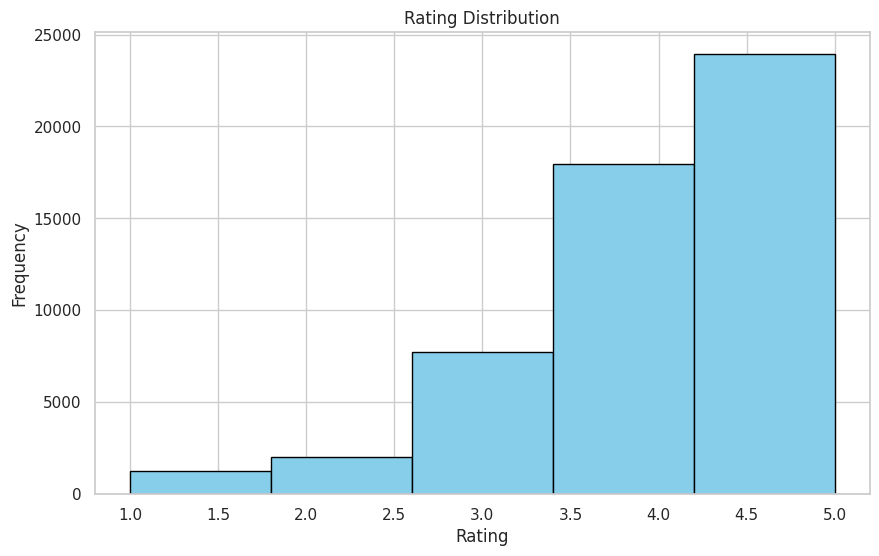

In [ ]:
plt.hist(master_df["Rating"], bins=5, color="skyblue", edgecolor="black")

plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Frequency")

plt.show()

##### 1. Why did you pick the specific chart?

We used a Histogram to understand how user ratings are distributed and to see how frequently each rating value occurs.

##### 2. What is/are the insight(s) found from the chart?

Most users give ratings between 4 and 5, which shows high customer satisfaction. Very few users give low ratings (1–2), indicating fewer negative experiences.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact:
High ratings (4–5) show strong customer satisfaction, which helps increase customer trust, repeat visits, and brand reputation.

Negative Impact:
Low ratings (1–2), though fewer, indicate some dissatisfied users. If not addressed, this may lead to negative reviews and reduced customer retention.

#### Chart - 2 --- Visit Mode Frequency

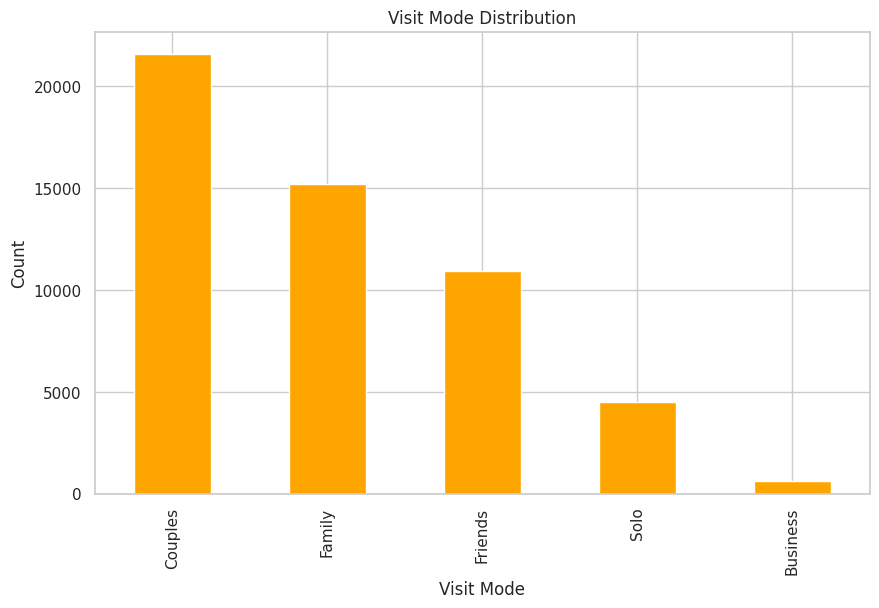

In [ ]:
master_df["VisitMode"].value_counts().plot(
    kind="bar",
    color="orange"
)

plt.title("Visit Mode Distribution")
plt.xlabel("Visit Mode")
plt.ylabel("Count")

plt.show()

##### 1. Why did you pick the specific chart?

We used a Bar Chart to compare the number of visits across different visit modes and understand which travel types are most common.

##### 2. What is/are the insight(s) found from the chart?

Couples and family trips are the most common, followed by friends. Solo and business trips are much less frequent.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact:
High participation in couples and family trips helps businesses focus on group packages, discounts, and family-friendly services.

Negative Impact:
Low business and solo travel indicates untapped customer segments. Ignoring these groups may limit future growth opportunities.

#### Chart - 3 --- Visits by Year

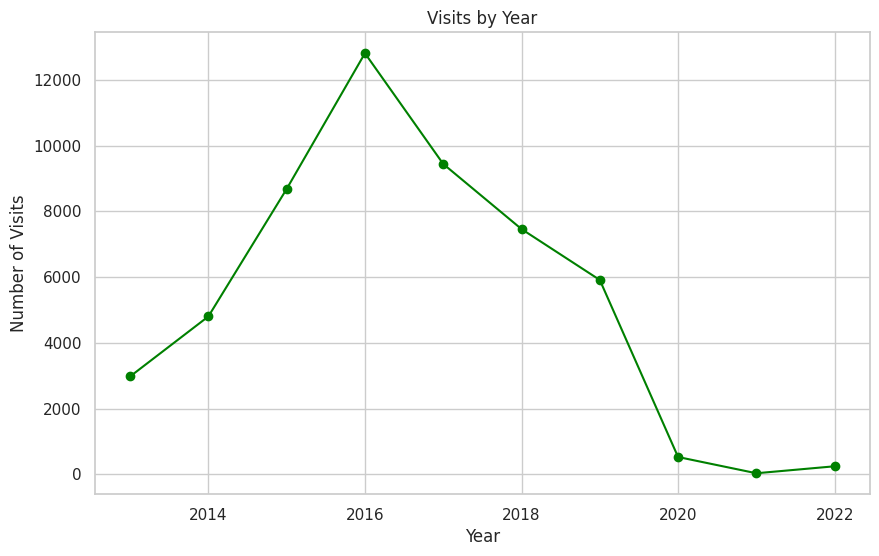

In [ ]:
year_counts = master_df["VisitYear"].value_counts().sort_index()

plt.plot(
    year_counts.index,
    year_counts.values,
    marker="o",
    color="green"
)

plt.title("Visits by Year")
plt.xlabel("Year")
plt.ylabel("Number of Visits")

plt.show()

##### 1. Why did you pick the specific chart?

We used a Line Chart to show the trend of tourist visits over different years and to understand how tourism changes over time.

##### 2. What is/are the insight(s) found from the chart?

Tourist visits increased steadily from 2013 to 2016, peaked in 2016, and then gradually declined. A sharp drop is seen after 2019, especially in 2020, indicating a major disruption in tourism.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact:
The growth period between 2013 and 2016 shows strong market potential and can be used as a reference for future expansion strategies.

Negative Impact:
The sharp decline after 2019 highlights vulnerability to external factors such as pandemics or economic downturns, which may affect business stability.

#### Chart - 4 --- Visits by Month

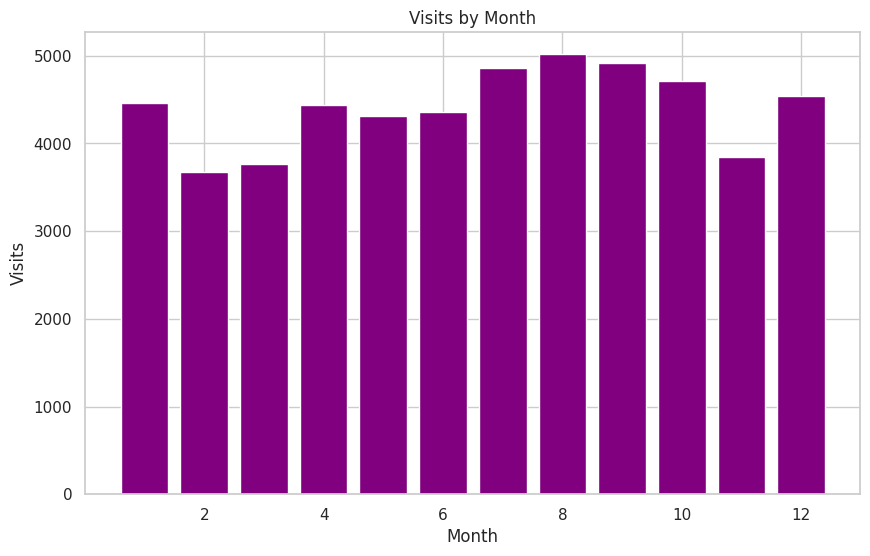

In [ ]:
month_counts = master_df["VisitMonth"].value_counts().sort_index()

plt.bar(
    month_counts.index,
    month_counts.values,
    color="purple"
)

plt.title("Visits by Month")
plt.xlabel("Month")
plt.ylabel("Visits")

plt.show()

##### 1. Why did you pick the specific chart?

We used a Bar Chart to compare the number of tourist visits across different months and identify seasonal travel patterns.

##### 2. What is/are the insight(s) found from the chart?

Tourist visits are highest during mid-year months, especially around July and August, indicating peak travel season. Lower visits are observed in early and late months.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact:
Understanding peak months helps tourism businesses plan promotions, pricing strategies, and resource allocation to maximize revenue.

Negative Impact:
Low-visit months may lead to reduced income. If not managed properly, this seasonality can affect business stability.

#### Chart - 5 --- Users by Continent

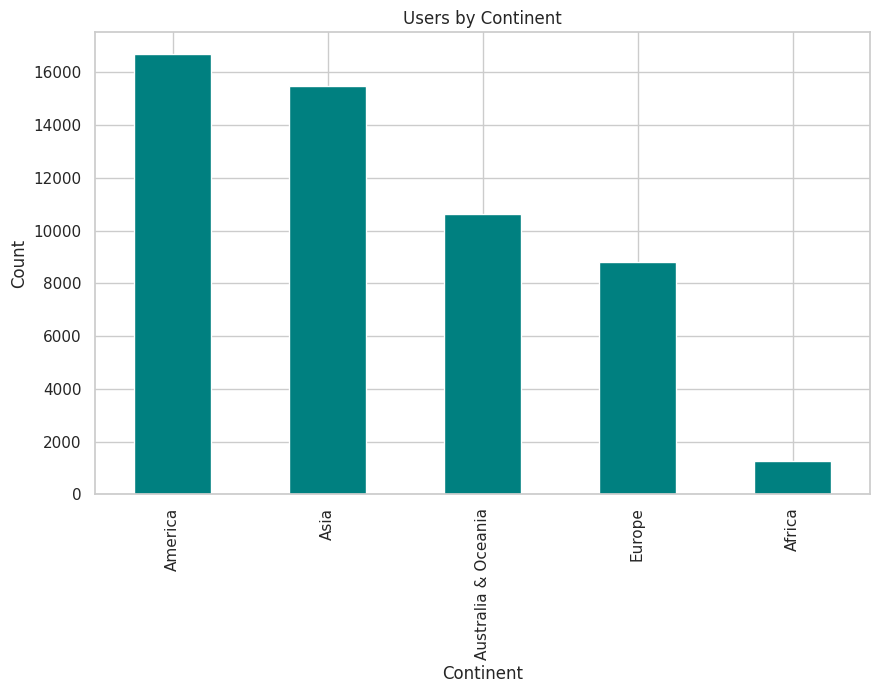

In [ ]:
master_df["Continent"].value_counts().plot(
    kind="bar",
    color="teal"
)

plt.title("Users by Continent")
plt.xlabel("Continent")
plt.ylabel("Count")

plt.show()

##### 1. Why did you pick the specific chart?

We used a Bar Chart to compare the number of users from different continents and understand geographic user distribution.

##### 2. What is/are the insight(s) found from the chart?

Most users come from America and Asia, followed by Australia & Oceania and Europe. Africa has the lowest number of users.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact:
High user presence in America and Asia allows businesses to focus marketing efforts and develop region-specific travel packages.

Negative Impact:
Low user participation from Africa indicates an untapped market. Ignoring this region may limit future growth opportunities.

#### Chart - 6  --- Attraction Type Distribution

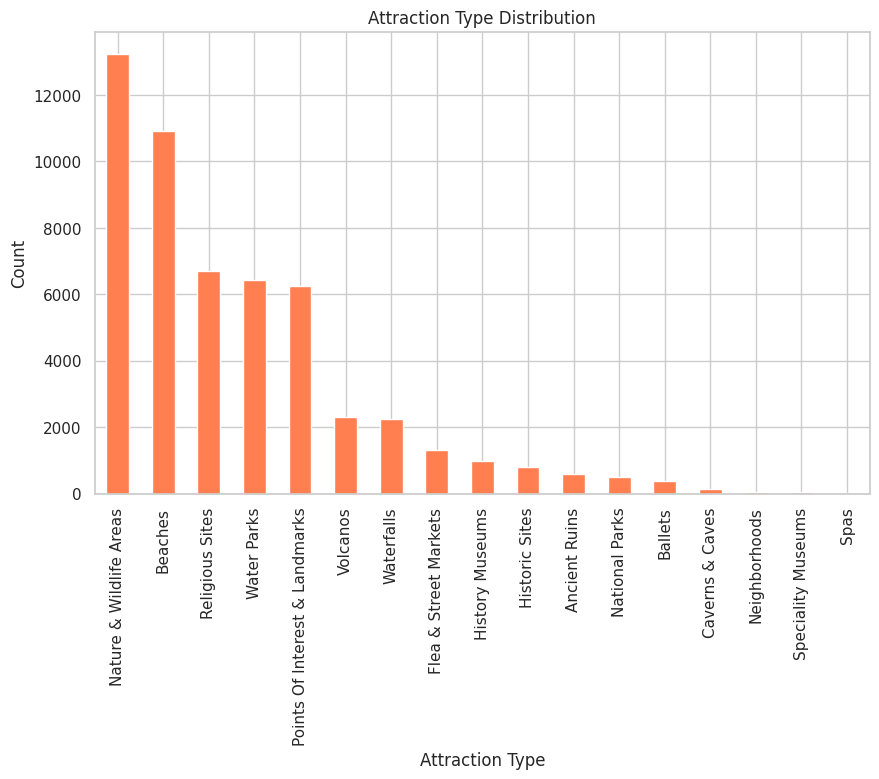

In [ ]:
master_df["AttractionType"].value_counts().plot(
    kind="bar",
    color="coral"
)

plt.title("Attraction Type Distribution")
plt.xlabel("Attraction Type")
plt.ylabel("Count")

plt.show()

##### 1. Why did you pick the specific chart?

We used a Bar Chart to compare the number of visits across different attraction types and identify the most popular categories.

##### 2. What is/are the insight(s) found from the chart?

Nature and wildlife areas, beaches, and religious sites receive the highest number of visits, while specialty museums and spas receive very low visits.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact:
High demand for nature, beach, and religious attractions helps tourism businesses focus investments on these popular categories.

Negative Impact:
Low interest in niche attractions may lead to underutilized resources and lower returns if not promoted properly.

#### Chart - 7  --- Top 20 Attractions

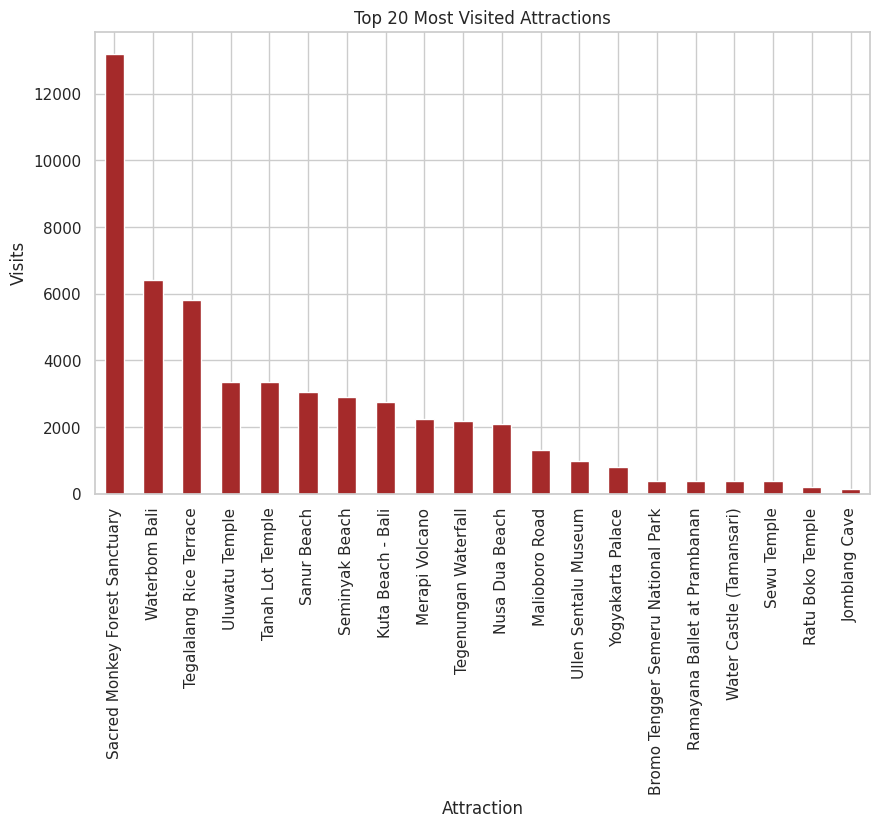

In [ ]:
top_attr = master_df["Attraction"].value_counts().head(20)

top_attr.plot(
    kind="bar",
    color="brown"
)

plt.title("Top 20 Most Visited Attractions")
plt.xlabel("Attraction")
plt.ylabel("Visits")

plt.xticks(rotation=90)
plt.show()

##### 1. Why did you pick the specific chart?

We used a Bar Chart to identify the most visited tourist attractions and understand visitor preferences.

##### 2. What is/are the insight(s) found from the chart?

Sacred Monkey Forest Sanctuary and Waterbom Bali are the most visited attractions, followed by popular temples and beaches.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact:
Highly visited attractions can be promoted as flagship destinations to attract more tourists and increase revenue.

Negative Impact:
Over-dependence on a few popular attractions may create overcrowding and neglect less-visited locations.

#### Chart - 8 --- Visits by Country (Top 20)

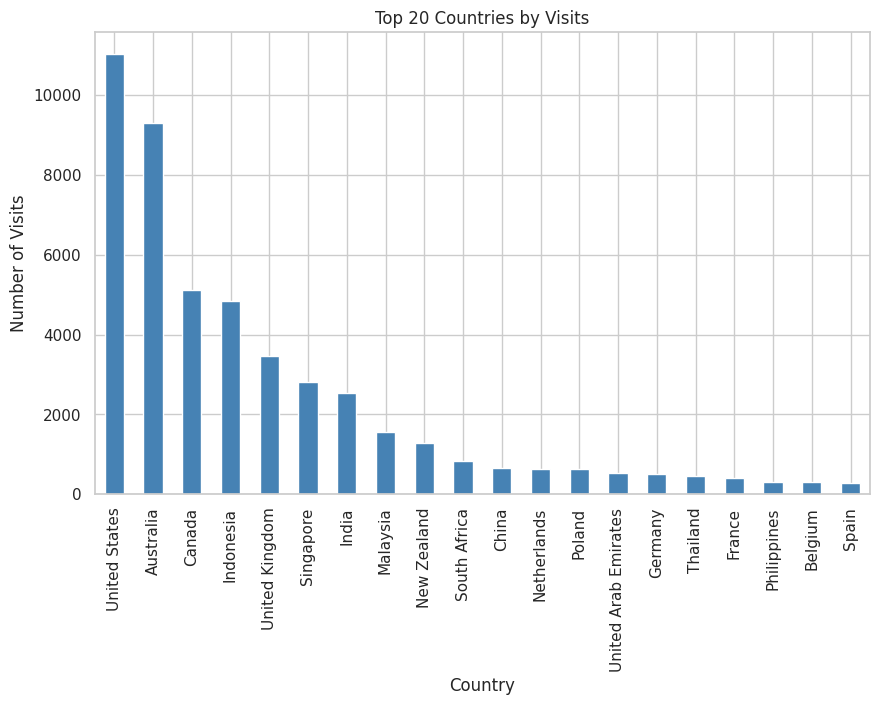

In [ ]:
top_countries = master_df["Country"].value_counts().head(20)

top_countries.plot(kind="bar", color="steelblue")

plt.title("Top 20 Countries by Visits")
plt.xlabel("Country")
plt.ylabel("Number of Visits")

plt.show()

##### 1. Why did you pick the specific chart?

We used a Bar Chart to compare tourist visits across different countries and identify major source markets.

##### 2. What is/are the insight(s) found from the chart?

The United States and Australia contribute the highest number of tourists, followed by Canada and Indonesia. Other countries contribute comparatively fewer visitors.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact:
High-visit countries can be prioritized for targeted marketing and partnerships.

Negative Impact:
Low contribution from many countries shows limited global reach and potential market gaps.

#### Chart - 9 --- Visits by Region

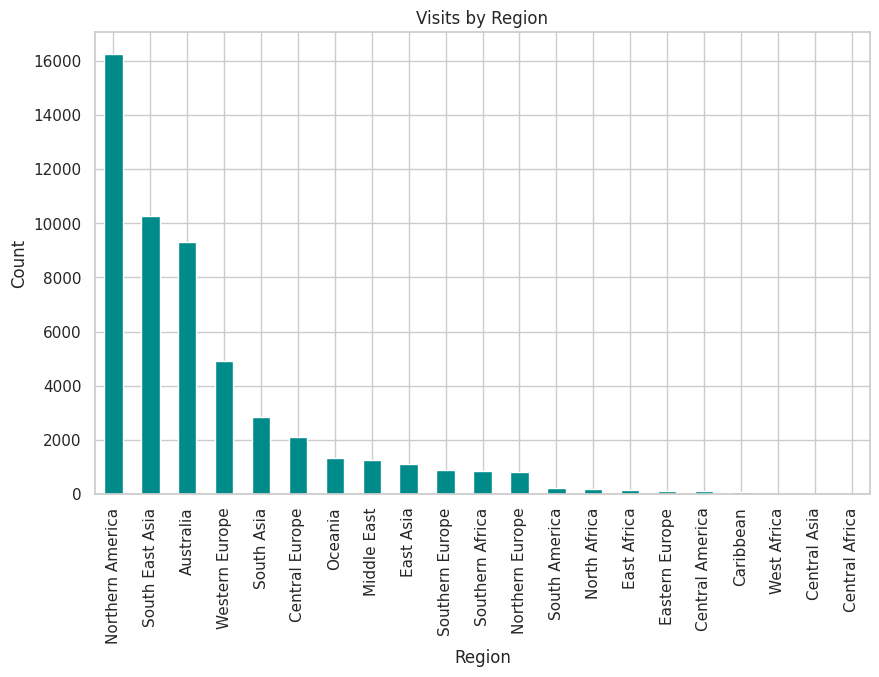

In [ ]:
master_df["Region"].value_counts().plot(
    kind="bar",
    color="darkcyan"
)

plt.title("Visits by Region")
plt.xlabel("Region")
plt.ylabel("Count")

plt.show()

##### 1. Why did you pick the specific chart?

We used a Bar Chart to analyze tourist distribution across different world regions.

##### 2. What is/are the insight(s) found from the chart?

Northern America, South-East Asia, and Australia generate the most visits, while many regions contribute very little.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact:
Strong regional performance helps in focusing regional promotions and investments.

Negative Impact:
Weak participation from some regions indicates underdeveloped tourism markets.

#### Chart - 10 --- Attraction Address Frequency (Top 10 Locations)

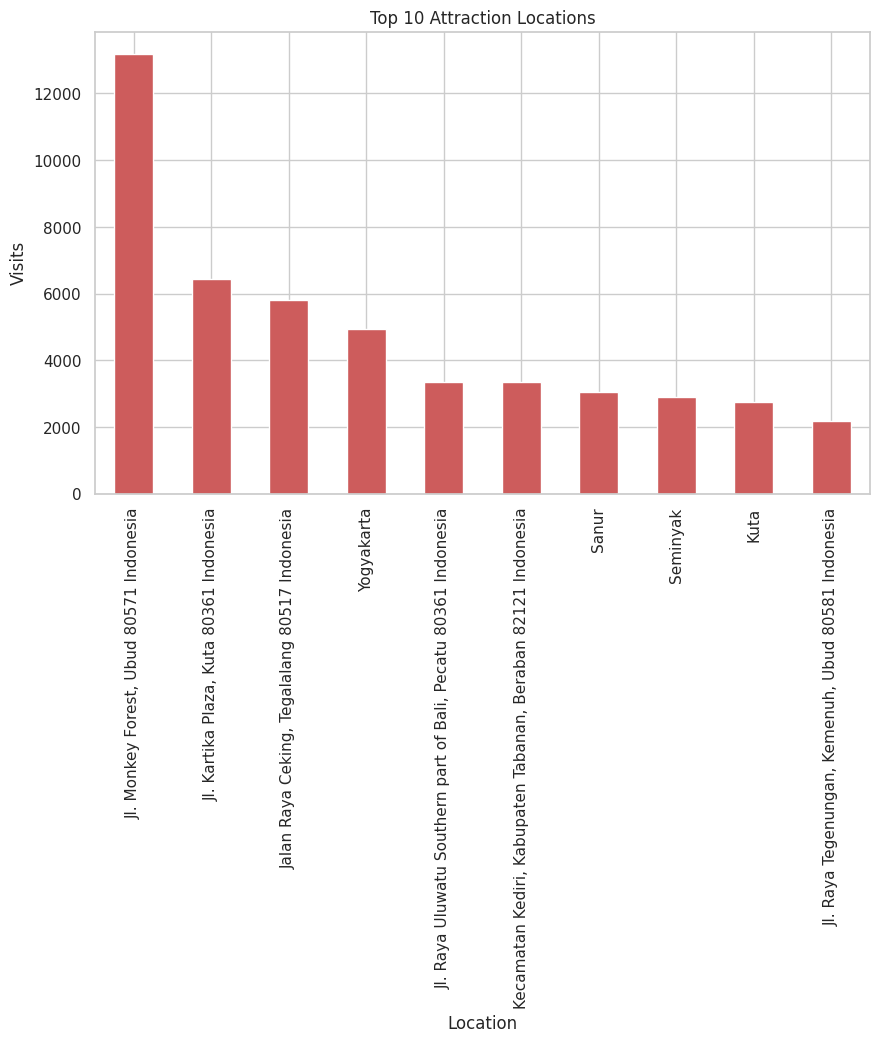

In [ ]:
top_places = master_df["AttractionAddress"].value_counts().head(10)

top_places.plot(kind="bar", color="indianred")

plt.title("Top 10 Attraction Locations")
plt.xlabel("Location")
plt.ylabel("Visits")

plt.xticks(rotation=90)
plt.show()

##### 1. Why did you pick the specific chart?

We used a Bar Chart to compare the number of visits across different attraction locations and identify the most popular tourist spots.

##### 2. What is/are the insight(s) found from the chart?

J.L. Monkey Forest in Ubud receives the highest number of visits, followed by locations in Kuta and Tegallalang. Most top locations are concentrated in Indonesia, especially in Bali.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact:
Highly visited locations can be promoted as premium destinations and supported with better infrastructure and services.

Negative Impact:
Overdependence on a few locations may cause overcrowding and reduce visitor satisfaction if not managed properly.

### BIVARIATE ANALYSIS

#### Chart - 11 --- Average Rating by Visit Mode

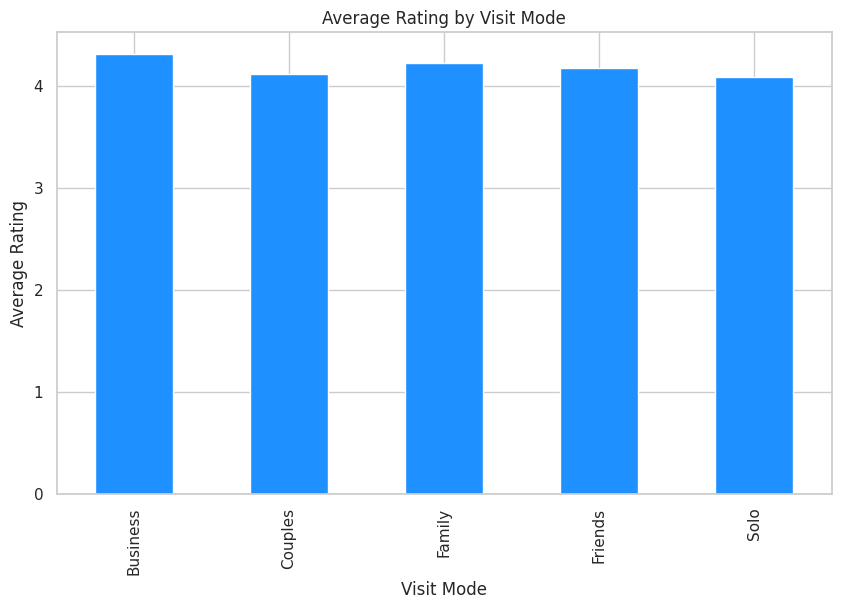

In [ ]:
avg_mode = master_df.groupby("VisitMode")["Rating"].mean()

avg_mode.plot(
    kind="bar",
    color="dodgerblue"
)

plt.title("Average Rating by Visit Mode")
plt.xlabel("Visit Mode")
plt.ylabel("Average Rating")

plt.show()

##### 1. Why did you pick the specific chart?

We used a Bar Chart to compare the average ratings across different visit modes and understand how user satisfaction varies by travel type.

##### 2. What is/are the insight(s) found from the chart?

Business and family travelers give slightly higher average ratings, while solo and couple travelers give comparatively lower ratings. Overall, ratings are high across all visit modes.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact:
Knowing that business and family travelers are more satisfied helps tourism companies design targeted packages and improve loyalty in these segments.

Negative Impact:
Lower satisfaction among solo and couple travelers may indicate unmet expectations and can affect repeat visits if not addressed.

#### Chart - 12 --- Average Rating by Attraction Type

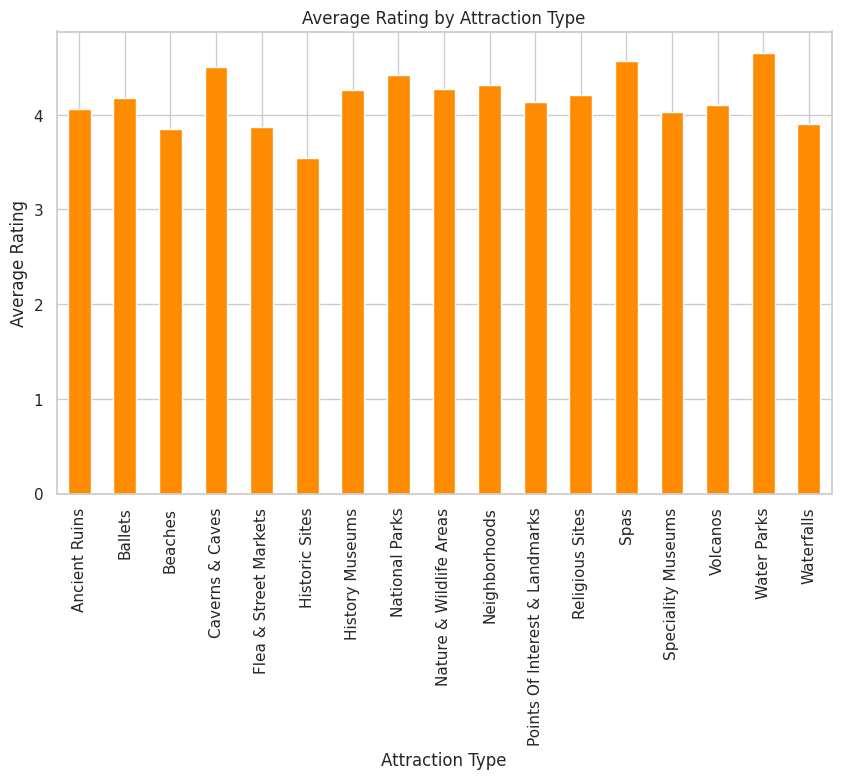

In [ ]:
avg_type = master_df.groupby("AttractionType")["Rating"].mean()

avg_type.plot(
    kind="bar",
    color="darkorange"
)

plt.title("Average Rating by Attraction Type")
plt.xlabel("Attraction Type")
plt.ylabel("Average Rating")

plt.show()

##### 1. Why did you pick the specific chart?

We used a Bar Chart to compare the average ratings across different attraction types and understand which types provide better visitor satisfaction.

##### 2. What is/are the insight(s) found from the chart?

Water parks, spas, and caverns & caves receive the highest average ratings, while historic sites and beaches have relatively lower ratings. Most attraction types still maintain ratings above 4, showing overall good satisfaction.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact:
High-rated attraction types can be promoted more to attract visitors and increase revenue.

Negative Impact:
Lower-rated attraction types may need service improvement or better management to avoid loss of visitors.

#### Chart - 13 --- Average Rating by Year

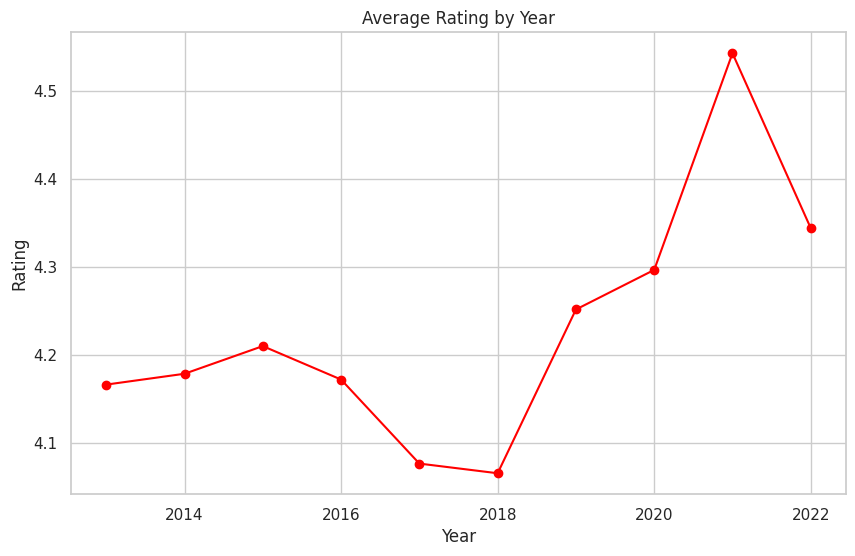

In [ ]:
avg_year = master_df.groupby("VisitYear")["Rating"].mean()

plt.plot(
    avg_year.index,
    avg_year.values,
    marker="o",
    color="red"
)

plt.title("Average Rating by Year")
plt.xlabel("Year")
plt.ylabel("Rating")

plt.show()

##### 1. Why did you pick the specific chart?

We used a Line Chart to analyze how average user ratings have changed over time from year to year.

##### 2. What is/are the insight(s) found from the chart?

Ratings remained stable from 2013 to 2016, declined slightly in 2017–2018, then improved steadily and peaked in 2021 before a small drop in 2022.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact:
The upward trend after 2018 shows improving service quality and customer satisfaction, which can be leveraged in marketing and branding.

Negative Impact:
The dip in 2017–2018 and slight fall in 2022 may indicate service or operational issues that need attention to prevent future decline.

#### Chart - 14 --- Visit Mode by Month

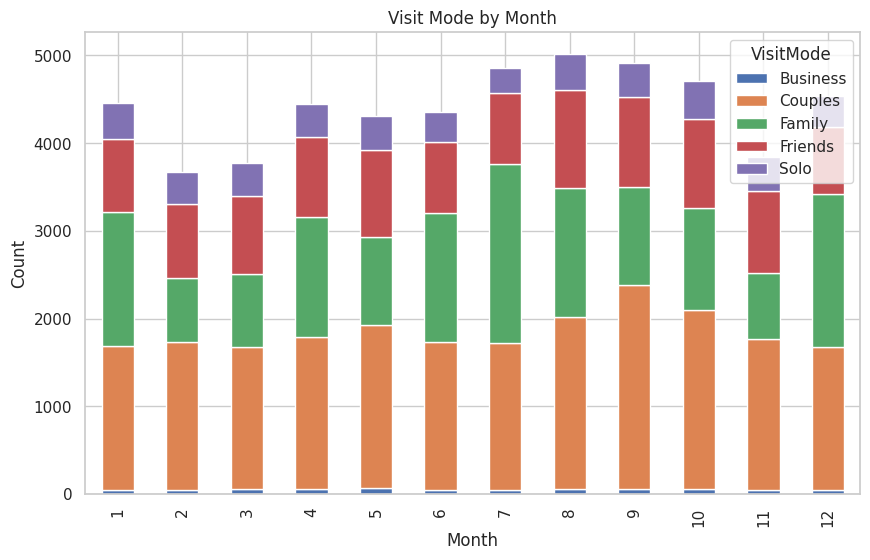

In [ ]:
mode_month = pd.crosstab(
    master_df["VisitMonth"],
    master_df["VisitMode"]
)

mode_month.plot(kind="bar", stacked=True)

plt.title("Visit Mode by Month")
plt.xlabel("Month")
plt.ylabel("Count")

plt.show()

##### 1. Why did you pick the specific chart?

We used a Stacked Bar Chart to compare monthly visit patterns across different visit modes in a single view.

##### 2. What is/are the insight(s) found from the chart?

Couples and family visits dominate in most months, with peak activity during mid-year (July–September). Business and solo visits remain consistently low throughout the year.Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact:
Understanding seasonal preferences helps tourism companies design targeted offers for families and couples during peak months.

Negative Impact:
Low business and solo travel demand limits revenue diversification and may require special promotions to attract these segments.

#### Chart - 15 --- Visits by Continent and Year

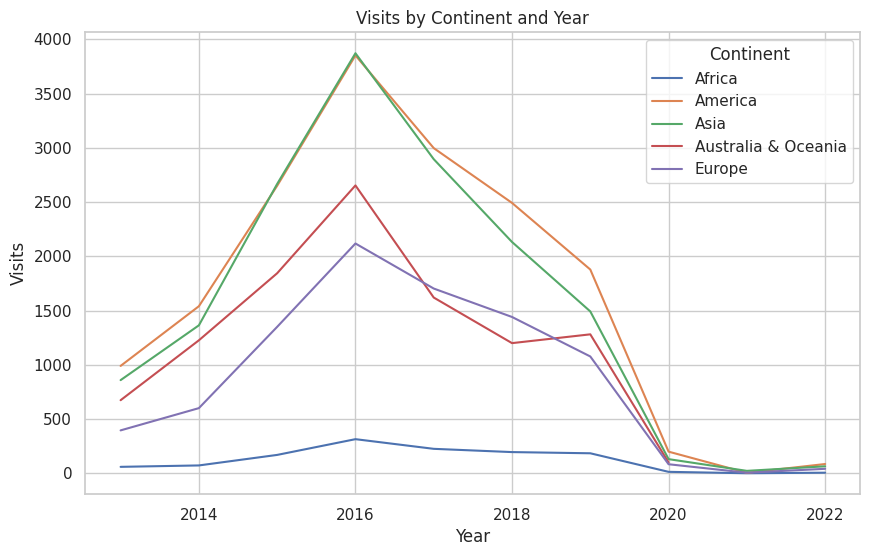

In [ ]:
cont_year = master_df.groupby(
    ["VisitYear", "Continent"]
).size().unstack()


cont_year.plot()

plt.title("Visits by Continent and Year")
plt.xlabel("Year")
plt.ylabel("Visits")

plt.show()

##### 1. Why did you pick the specific chart?

We used a Multi-Line Chart to compare yearly visit trends across different continents and understand regional performance over time.

##### 2. What is/are the insight(s) found from the chart?

Asia and America show the highest number of visits, peaking around 2016. All continents experienced a sharp decline in 2020, followed by slow recovery after 2021. Africa consistently has the lowest visits.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact:
Identifying strong markets like Asia and America helps tourism companies focus marketing and expansion strategies in high-performing regions.

Negative Impact:
The sharp drop in 2020 highlights vulnerability to global disruptions, and slow recovery in some regions may affect long-term growth.

#### Chart - 16 --- Attraction Popularity vs Rating

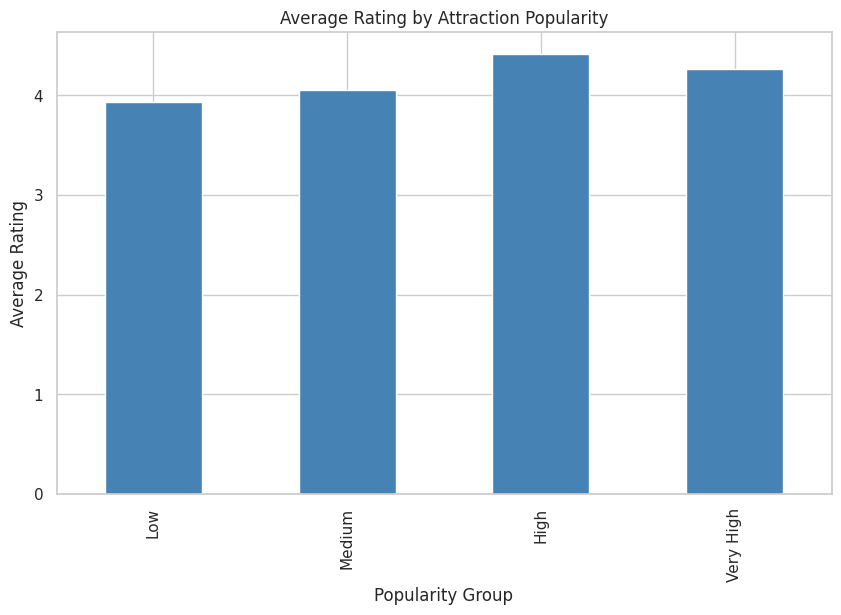

In [ ]:
# Calculate popularity
popularity = master_df["Attraction"].value_counts()
master_df["AttractionCount"] = master_df["Attraction"].map(popularity)


# Create bins based on distribution
master_df["PopularityGroup"] = pd.qcut(
    master_df["AttractionCount"],
    q=4,
    labels=["Low", "Medium", "High", "Very High"]
)


# Average rating per group
avg_pop_rating = master_df.groupby("PopularityGroup")["Rating"].mean()


# Plot
avg_pop_rating.plot(kind="bar", color="steelblue")

plt.title("Average Rating by Attraction Popularity")
plt.xlabel("Popularity Group")
plt.ylabel("Average Rating")

plt.show()


##### 1. Why did you pick the specific chart?

We used a Bar Chart to compare average ratings across different attraction popularity groups (Low, Medium, High, Very High).

##### 2. What is/are the insight(s) found from the chart?

Highly popular attractions receive better average ratings than less popular ones. The “High” popularity group has the highest satisfaction, while “Low” popularity attractions have comparatively lower ratings.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact:
Well-performing and popular attractions can be prioritized for promotions and partnerships to maximize customer satisfaction and revenue.

Negative Impact:
Less popular attractions with lower ratings may struggle to attract visitors and may require quality improvements or better marketing.

### MULTIVARIATE ANALYSIS

#### Chart - 17 --- Correlation Heatmap

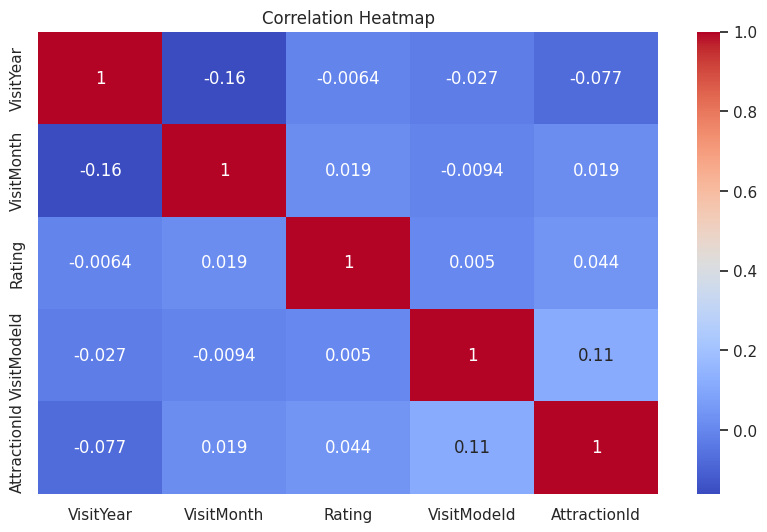

In [ ]:
num_cols = [
    "VisitYear", "VisitMonth", "Rating",
    "VisitModeId", "AttractionId"
]

corr = master_df[num_cols].corr()

sns.heatmap(
    corr,
    annot=True,
    cmap="coolwarm"
)

plt.title("Correlation Heatmap")

plt.show()

##### 1. Why did you pick the specific chart?

We used a Correlation Heatmap to analyze the relationship between numerical variables and identify how strongly they are related to each other.

##### 2. What is/are the insight(s) found from the chart?

Most variables show very weak correlation with each other. Rating has almost no relationship with visit year, month, or attraction ID. Visit mode and attraction ID show a small positive relationship, but it is not strong.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact:
Since ratings are not strongly influenced by time or IDs, tourism platforms can focus more on service quality and user experience to improve satisfaction.

Negative Impact:
Weak correlations mean it is harder to predict ratings using simple features, so more advanced feature engineering may be required for better model performance.

#### Chart - 18 --- Correlation Heatmap for Visit Mode  Vs Continent

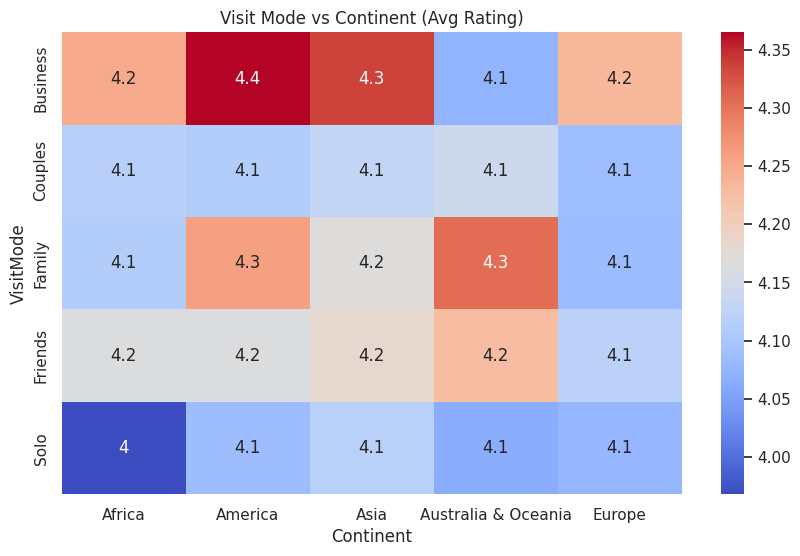

In [ ]:
pivot = master_df.pivot_table(
    values="Rating",
    index="VisitMode",
    columns="Continent",
    aggfunc="mean"
)

sns.heatmap(
    pivot,
    annot=True,
    cmap="coolwarm"
)

plt.title("Visit Mode vs Continent (Avg Rating)")
plt.show()

##### 1. Why did you pick the specific chart?

We used a heatmap to compare average ratings across Visit Modes and Continents because it clearly shows patterns and differences between two categorical variables.

##### 2. What is/are the insight(s) found from the chart?

- Business travelers in America and Asia give the highest ratings.

- Family visits in America and Australia & Oceania have strong satisfaction.

- Couples and Friends show stable ratings across all continents.

- Solo travelers give slightly lower ratings in Africa compared to other regions.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive impact:

- Since Business and Family travelers give higher ratings in America and Asia, marketing and service focus can be increased in these regions.

- Travel packages can be customized based on popular visit modes per continent.

Negative impact:

- Lower ratings for Solo travelers in Africa may indicate service or infrastructure issues.

- This may reduce solo tourism if not improved.

#### Chart - 19 - Pair Plot



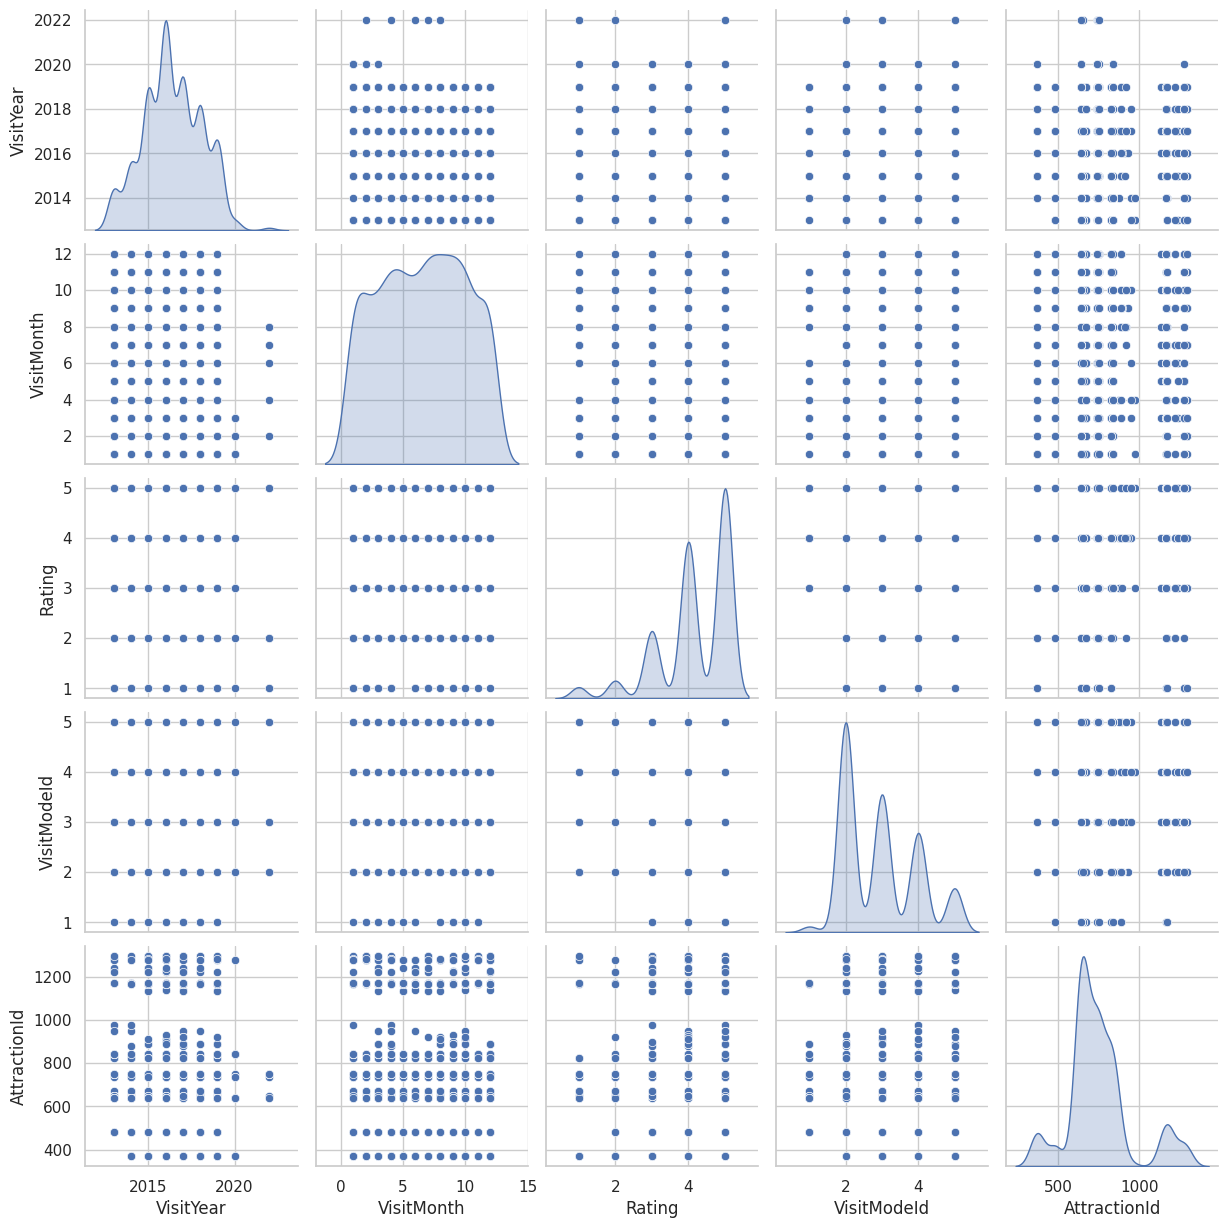

In [ ]:
sns.pairplot(
    master_df[num_cols].sample(2000),
    diag_kind="kde"
)

plt.show()

##### 1. Why did you pick the specific chart?

We used a Pair Plot (Scatter Matrix) to visualize the relationships and distributions among multiple numerical variables at the same time.

##### 2. What is/are the insight(s) found from the chart?

Most variable pairs show scattered patterns, indicating weak relationships. Ratings are mostly concentrated between 3 and 5, while visit year and month are evenly distributed. Attraction IDs and visit modes show clustering, reflecting categorical behavior.

##### 3. Will the gained insights help create a positive business impact? Are there any negative trends?



Positive Impact:
The plot helps identify which features are independent and which may be useful for modeling, supporting better feature selection for machine learning.

Negative Impact:
Since most relationships are weak, simple models may not perform well without additional feature engineering or external data.

#### Chart - 20 - Rating by Continent and Visit Mode

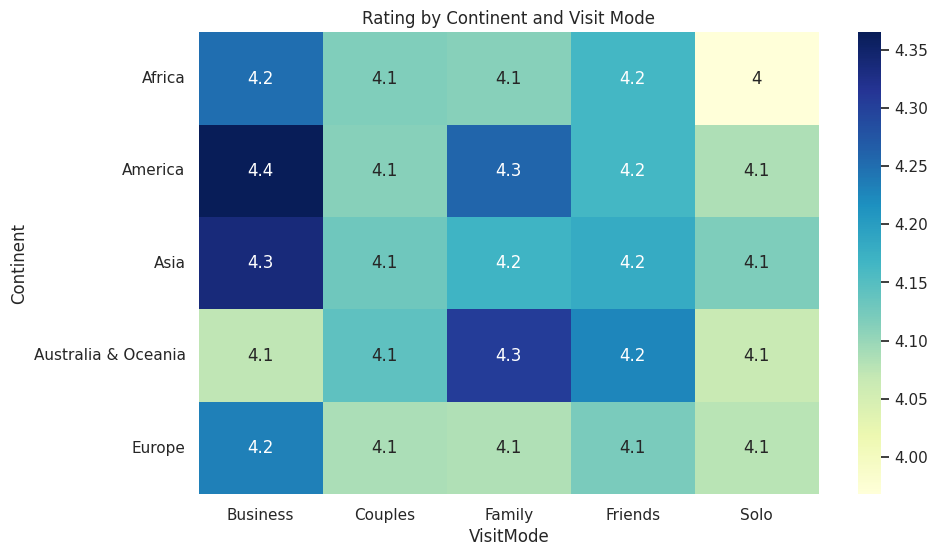

In [ ]:
pivot = master_df.pivot_table(
    values="Rating",
    index="Continent",
    columns="VisitMode",
    aggfunc="mean"
)

sns.heatmap(
    pivot,
    annot=True,
    cmap="YlGnBu"
)

plt.title("Rating by Continent and Visit Mode")

plt.show()


##### 1. Why did you pick the specific chart?

We used a Heatmap to compare average ratings across different continents and visit modes in a single visual representation.

##### 2. What is/are the insight(s) found from the chart?

Business and family travelers generally give higher ratings across most continents. America and Asia show the highest satisfaction levels, while Africa has slightly lower ratings for solo travelers.

##### 3. Will the gained insights help create a positive business impact? Are there any negative trends?

Positive Impact:
Understanding regional preferences and satisfaction helps tourism platforms design customized packages and improve services for specific traveler segments.

Negative Impact:
Lower ratings in some region–mode combinations may indicate service gaps that can affect customer retention if not addressed.

## ***5. Hypothesis Testing***

### Hypothetical Statement - 1 --- Does Visit Mode Affect Ratings?

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

To check whether user ratings differ based on visit mode.

 Null Hypothesis (H₀): There is no significant difference in average ratings across visit modes.

Alternative Hypothesis (H₁): There is a significant difference in average ratings across visit modes.

#### 2. Perform an appropriate statistical test.

In [ ]:
from scipy.stats import f_oneway

# Group ratings by visit mode
groups = [
    group["Rating"].values
    for name, group in master_df.groupby("VisitMode")
]

# Perform ANOVA
f_stat, p_value = f_oneway(*groups)

print("F-Statistic:", round(f_stat, 4))
print("P-Value:", round(p_value, 4))

# Decision
if p_value < 0.05:
    print("Result: Reject H0 (Visit mode affects ratings)")
else:
    print("Result: Fail to Reject H0 (No effect of visit mode)")


F-Statistic: 35.2083
P-Value: 0.0
Result: Reject H0 (Visit mode affects ratings)


Since the P-value is less than 0.05, we reject the null hypothesis and accept the alternative hypothesis. This confirms that visit mode has a significant impact on user ratings, indicating that different types of travelers have different satisfaction levels. This insight can help tourism platforms design better targeted travel packages.

##### Which statistical test have you done to obtain P-Value?

We used a One-Way ANOVA (Analysis of Variance) test to calculate the F-statistic and P-value.

##### Why did you choose the specific statistical test?

One-Way ANOVA was chosen because we needed to compare the average ratings across more than two visit mode groups (Business, Family, Couples, Friends, Solo).

### Hypothetical Statement - 2 --- Does Continent Affect Ratings?

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

To check whether user ratings differ across continents.

Null Hypothesis (H₀): There is no significant difference in ratings across continents.

Alternative Hypothesis (H₁): There is a significant difference in ratings across continents.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Group ratings by continent
groups = [
    group["Rating"].values
    for name, group in master_df.groupby("Continent")
]

# Perform ANOVA
f_stat, p_value = f_oneway(*groups)

print("F-Statistic:", round(f_stat, 4))
print("P-Value:", round(p_value, 4))

# Decision
if p_value < 0.05:
    print("Result: Reject H0 (Continent affects ratings)")
else:
    print("Result: Fail to Reject H0 (No effect of continent)")

F-Statistic: 19.8053
P-Value: 0.0
Result: Reject H0 (Continent affects ratings)


Since the P-value is less than 0.05, we reject the null hypothesis and accept the alternative hypothesis. This shows that continent has a significant impact on user ratings, meaning user satisfaction varies across different regions. This insight can help tourism companies customize services and marketing strategies for each continent.

##### Which statistical test have you done to obtain P-Value?

We used a One-Way ANOVA (Analysis of Variance) test to calculate the F-statistic and P-value.

##### Why did you choose the specific statistical test?

One-Way ANOVA was chosen because we needed to compare the average ratings across multiple continents, which are more than two independent groups.

### Hypothetical Statement - 3 --- Does Attraction Popularity Affect Ratings?

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

To check whether popular attractions receive different ratings compared to less popular ones.

Null Hypothesis (H₀): Attraction popularity has no significant effect on ratings.

Alternative Hypothesis (H₁): Attraction popularity has a significant effect on ratings.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Calculate popularity
popularity = master_df["Attraction"].value_counts()
master_df["AttractionCount"] = master_df["Attraction"].map(popularity)

# Create popularity groups
master_df["PopularityGroup"] = pd.qcut(
    master_df["AttractionCount"],
    q=4,
    labels=["Low", "Medium", "High", "Very High"]
)

# Group ratings by popularity group
groups = [
    group["Rating"].values
    for name, group in master_df.groupby("PopularityGroup")
]

# Perform ANOVA
f_stat, p_value = f_oneway(*groups)

print("F-Statistic:", round(f_stat, 4))
print("P-Value:", round(p_value, 4))

# Decision
if p_value < 0.05:
    print("Result: Reject H0 (Popularity affects ratings)")
else:
    print("Result: Fail to Reject H0 (No effect of popularity)")

F-Statistic: 673.8688
P-Value: 0.0
Result: Reject H0 (Popularity affects ratings)


Since the P-value is less than 0.05, we reject the null hypothesis and accept the alternative hypothesis. This confirms that attraction popularity has a significant impact on user ratings, showing that more popular attractions generally receive higher satisfaction. This insight helps tourism platforms prioritize high-performing attractions and improve low-performing ones.

##### Which statistical test have you done to obtain P-Value?

We used a One-Way ANOVA (Analysis of Variance) test to calculate the F-statistic and P-value.

##### Why did you choose the specific statistical test?

One-Way ANOVA was chosen because we needed to compare the average ratings across multiple attraction popularity groups (Low, Medium, High, Very High).

## ***6. Feature Engineering & Data Pre-processing***

Goal: Prepare ML-ready datasets for Regression, Classification, and Recommendation

### Objective:
To transform the master dataset into machine learning–ready format by creating new features,
encoding categorical variables, scaling numerical features, and preparing task-specific datasets.

#### Create New Features

In this step, we create new meaningful features from existing data to improve model performance.

In [ ]:
# FEATURE ENGINEERING

# User Average Rating
master_df["User_Avg_Rating"] = (
    master_df.groupby("UserId")["Rating"].transform("mean")
)

# Attraction Popularity
attraction_counts = master_df["AttractionId"].value_counts()

master_df["Attraction_Popularity"] = master_df["AttractionId"].map(
    attraction_counts
)

# Visit Frequency per User
user_visits = master_df["UserId"].value_counts()

master_df["Visit_Frequency"] = master_df["UserId"].map(user_visits)

# Seasonal Feature
def get_season(month):

    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    else:
        return "Autumn"

master_df["Season"] = master_df["VisitMonth"].apply(get_season)

# User Experience Level
def experience_level(count):

    if count <= 3:
        return "New"
    elif count <= 10:
        return "Regular"
    else:
        return "Frequent"

master_df["User_Experience"] = master_df["Visit_Frequency"].apply(
    experience_level
)

print("✅ Feature Engineering Completed")


✅ Feature Engineering Completed


#### 2. Encoding Categorical Variables

Convert categorical features into numerical form for machine learning models.

In [ ]:
# LABEL ENCODING

from sklearn.preprocessing import LabelEncoder
import joblib

encode_cols = [
    "VisitMode",
    "Continent",
    "Country",
    "Region",
    "CityName",
    "AttractionType",
    "Season",
    "User_Experience"
]

label_encoders = {}

for col in encode_cols:

    if col in master_df.columns:

        le = LabelEncoder()
        master_df[col] = le.fit_transform(master_df[col])

        label_encoders[col] = le

# Save encoders for deployment
joblib.dump(label_encoders, MODELS_DIR/"label_encoders.pkl")

print("✅ Categorical Encoding Completed")

✅ Categorical Encoding Completed


#### Scaling Numerical Features


Scale numerical features to improve model convergence.

In [ ]:
# FEATURE SCALING

from sklearn.preprocessing import StandardScaler

scale_cols = [
    "Rating",
    "User_Avg_Rating",
    "Attraction_Popularity",
    "Visit_Frequency"
]

scaler = StandardScaler()

master_df[scale_cols] = scaler.fit_transform(
    master_df[scale_cols]
)

# Save scaler
joblib.dump(scaler, MODELS_DIR/"scaler.pkl")

print("✅ Feature Scaling Completed")


✅ Feature Scaling Completed


#### 4. ML Dataset Preparation

Create separate datasets for:
- Regression
- Classification
- Recommendation

Regression Dataset (Predict Rating)

In [ ]:
# REGRESSION DATASET


regression_cols = [
    "VisitYear",
    "VisitMonth",
    "VisitModeId",
    "AttractionId",
    "Continent",
    "RegionId",
    "CountryId",
    "CityId",
    "User_Avg_Rating",
    "Attraction_Popularity",
    "Visit_Frequency",
    "Season",
    "User_Experience",
    "Rating"
]

regression_df = master_df[regression_cols]

regression_df.to_csv(
    PROCESSED_DATA_DIR/"regression_data.csv",
    index=False
)

print("✅ Regression Dataset Saved")


✅ Regression Dataset Saved


Classification Dataset


In [ ]:
# CLASSIFICATION DATASET (Visit Mode Prediction)

classification_cols = [

    # Time Features
    "VisitYear",
    "VisitMonth",

    # User Demographics
    "Continent",
    "RegionId",
    "CountryId",
    "CityId",

    # Attraction Features
    "AttractionId",
    "AttractionType",
    "Attraction_Popularity",

    # User Behavior
    "Visit_Frequency",
    "User_Experience",
    "Season",

    # Target
    "VisitMode"
]

classification_df = master_df[classification_cols]

# Save dataset
classification_df.to_csv(
    PROCESSED_DATA_DIR / "classification_data.csv",
    index=False
)

print("✅ Classification Dataset (VisitMode) Created")



✅ Classification Dataset (VisitMode) Created


Recommendation Dataset (Used for collaborative and content-based filtering.)

In [ ]:
# RECOMMENDATION DATASET

reco_cols = [
    "UserId",
    "AttractionId",
    "Rating",
    "VisitModeId",
    "AttractionType",
    "CityId",
    "Attraction_Popularity"
]

reco_df = master_df[reco_cols]

# Save dataset
reco_df.to_csv(PROCESSED_DATA_DIR /
    "reco_data.csv",
    index=False
)

print("✅ Recommendation Dataset Saved")


✅ Recommendation Dataset Saved


#### 5. Final Validation

Verify dataset shapes and preview samples.

In [ ]:

print("Regression Shape:", regression_df.shape)
print("Classification Shape:", classification_df.shape)
print("Recommendation Shape:", reco_df.shape)

print("\nRegression Sample:")
display(regression_df.head())

print("\nClassification Sample:")
display(classification_df.head())

print("\nRecommendation Sample:")
display(reco_df.head())

print("✅ Phase 4 Completed Successfully")

Regression Shape: (52898, 14)
Classification Shape: (52898, 13)
Recommendation Shape: (52898, 7)

Regression Sample:


,VisitYear,VisitMonth,VisitModeId,AttractionId,Continent,RegionId,CountryId,CityId,User_Avg_Rating,Attraction_Popularity,Visit_Frequency,Season,User_Experience,Rating
0,2022,10,2,640,3,15,109,4341,1.016188,1.613034,-0.484066,0,1,0.867672
1,2022,10,4,640,1,8,48,464,1.016188,1.613034,-0.484066,0,1,0.867672
2,2022,10,3,640,1,8,51,774,1.016188,1.613034,-0.484066,0,1,0.867672
3,2022,10,3,640,1,8,48,583,-1.397241,1.613034,-0.195390,0,1,-1.193034
4,2022,10,2,640,1,8,51,1396,-1.397241,1.613034,0.093286,0,1,-1.193034



Classification Sample:


,VisitYear,VisitMonth,Continent,RegionId,CountryId,CityId,AttractionId,AttractionType,Attraction_Popularity,Visit_Frequency,User_Experience,Season,VisitMode
0,2022,10,3,15,109,4341,640,8,1.613034,-0.484066,1,0,1
1,2022,10,1,8,48,464,640,8,1.613034,-0.484066,1,0,3
2,2022,10,1,8,51,774,640,8,1.613034,-0.484066,1,0,2
3,2022,10,1,8,48,583,640,8,1.613034,-0.195390,1,0,2
4,2022,10,1,8,51,1396,640,8,1.613034,0.093286,1,0,1



Recommendation Sample:


,UserId,AttractionId,Rating,VisitModeId,AttractionType,CityId,Attraction_Popularity
0,70456,640,0.867672,2,8,4341,1.613034
1,7567,640,0.867672,4,8,464,1.613034
2,79069,640,0.867672,3,8,774,1.613034
3,31019,640,-1.193034,3,8,583,1.613034
4,43611,640,-1.193034,2,8,1396,1.613034


✅ Phase 4 Completed Successfully


##  **7: Model Building, Training & Evaluation**

## Objective:
Train multiple machine learning models for Regression and Classification,
compare their performance, and select the best-performing models.
Build, train, evaluate, and save machine learning models for:
- Rating Prediction (Regression)
- Visit Mode Prediction (Classification)
- Attraction Recommendation

### Load Prepared Datasets

In [ ]:
import pandas as pd

# Load datasets
regression_df = pd.read_csv(PROCESSED_DATA_DIR/"regression_data.csv")
classification_df = pd.read_csv(PROCESSED_DATA_DIR/"classification_data.csv")
reco_df = pd.read_csv(PROCESSED_DATA_DIR/"reco_data.csv")

print("✅ Datasets Loaded Successfully")

✅ Datasets Loaded Successfully


### **REGRESSION MODELS**

Train 3 Models

We use:

- Linear Regression
- Random Forest
- Gradient Boosting

Metrics Storage

In [ ]:
regression_metrics = []

Data Preparation

In [ ]:
from sklearn.model_selection import train_test_split

X_reg = regression_df.drop("Rating", axis=1)
y_reg = regression_df["Rating"]

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(
    X_reg,
    y_reg,
    test_size=0.2,
    random_state=42
)

print("Regression Train/Test Split Done")

Regression Train/Test Split Done


#### **MODEL 1: Linear Regression**

Build The Model

In [ ]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()

print("Linear Regression Model Created")

Linear Regression Model Created


Training The Model

In [ ]:
lr_model.fit(X_train_r, y_train_r)

print("Linear Regression Training Completed")

Linear Regression Training Completed


Prediction Using The Model

In [ ]:
lr_pred = lr_model.predict(X_test_r)

print("Prediction Completed")

Prediction Completed


Evaluation OF The Model

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

lr_mse = mean_squared_error(y_test_r, lr_pred)
lr_r2 = r2_score(y_test_r, lr_pred)

print("MSE:", lr_mse)
print("R2 Score:", lr_r2)

MSE: 0.26605613828125246
R2 Score: 0.7327754871974891


Storing The metrics

In [ ]:
# Store metrics
regression_metrics.append([
    "Linear Regression", lr_mse, lr_r2
])

Saving the model

In [ ]:
import joblib

# Save trained Linear Regression model
joblib.dump(lr_model, MODELS_DIR / "linear_regression.pkl")

print("✅ Model 1 (Linear Regression) saved successfully")

✅ Model 1 (Linear Regression) saved successfully


Performance Visualization

Actual vs Predicted Rating

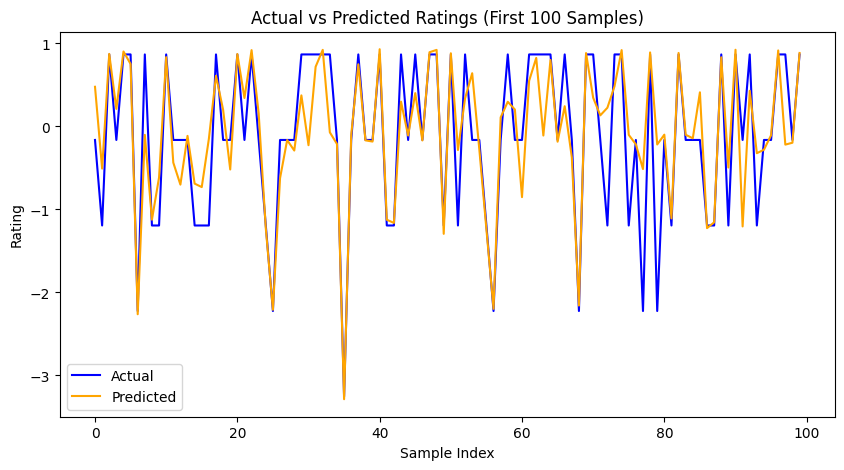

In [ ]:
# Sort for line plot
comparison_df = pd.DataFrame({
    "Actual": y_test_r.values,
    "Predicted": lr_pred
}).reset_index(drop=True)

comparison_df = comparison_df.head(100)

plt.figure(figsize=(10,5))

plt.plot(comparison_df["Actual"], label="Actual", color="blue")
plt.plot(comparison_df["Predicted"], label="Predicted", color="orange")

plt.title("Actual vs Predicted Ratings (First 100 Samples)")
plt.xlabel("Sample Index")
plt.ylabel("Rating")
plt.legend()

plt.show()

**Insight:**
- The predicted ratings closely follow the actual ratings for most samples, showing that the model has learned the general pattern in the data.

- Small gaps between the actual and predicted lines indicate good prediction accuracy.

- Some sharp drops and peaks are not perfectly captured, which means the model struggles with extreme rating values.

- Overall, the model performs well for average cases but has limited accuracy for outliers.

Conclusion:
This model is suitable for basic rating prediction but can be improved using advanced models and feature tuning.

Average Error Plot

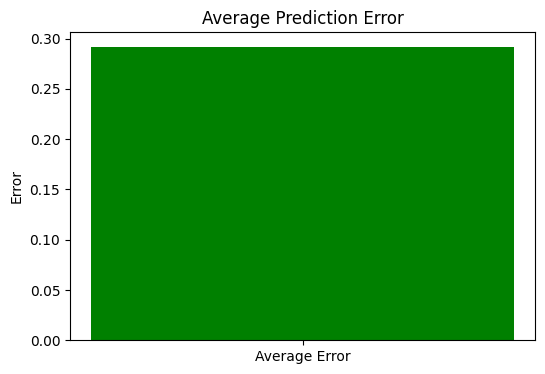

In [ ]:
errors = abs(y_test_r - lr_pred)

plt.figure(figsize=(6,4))

plt.bar(
    ["Average Error"],
    [errors.mean()],
    color="green"
)

plt.title("Average Prediction Error")
plt.ylabel("Error")

plt.show()

**Insight:**

- The bar shows that the average prediction error is around 0.29, which is relatively low.

- This means the model’s predictions are usually close to the actual ratings.

- A low average error indicates good overall performance and stability.

- However, this value also shows that small prediction mistakes still exist.

Conclusion:
The model gives reliable predictions on average, but further tuning and advanced models can help reduce the error even more.

Error Distribution plotting

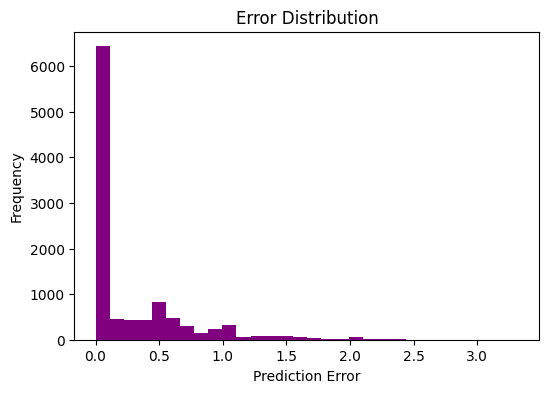

In [ ]:
plt.figure(figsize=(6,4))

plt.hist(errors, bins=30, color="purple")

plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.title("Error Distribution")

plt.show()

**Insight:**

- Most prediction errors are concentrated near 0, showing that the model makes accurate predictions for most cases.

- The highest frequency at low error values indicates strong consistency.

- A small number of predictions have higher errors, forming a right-side tail.

- These large errors represent difficult or unusual cases that the model cannot predict well.

Conclusion:
The model performs well for most data points, but a few outliers reduce overall accuracy. Further feature improvement and advanced models can help reduce these large errors.

#### **MODEL 2: RANDOM FOREST REGRESSION**

Build, Train, Predict, Evaluate (Without Tuning)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

# Build model (default parameters)

rf_model = RandomForestRegressor(
    random_state=42,
    n_jobs=-1
)

# Train model
rf_model.fit(X_train_r, y_train_r)

# Predict
rf_pred = rf_model.predict(X_test_r)

# Evaluate
rf_mse = mean_squared_error(y_test_r, rf_pred)
rf_r2 = r2_score(y_test_r, rf_pred)

print("Random Forest (Without Tuning)")
print("MSE:", rf_mse)
print("R2 Score:", rf_r2)

# Store metrics
regression_metrics.append([
    "Random Forest (Default)", rf_mse, rf_r2
])

Random Forest (Without Tuning)
MSE: 0.30922641304246457
R2 Score: 0.6894156319611466


Hyperparameter Tuning

In [ ]:
# Parameter grid

rf_params = {
    "n_estimators": [100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}

# GridSearch

rf_grid = GridSearchCV(
    RandomForestRegressor(random_state=42),
    rf_params,
    cv=3,
    scoring="r2",
    n_jobs=-1
)

rf_grid.fit(X_train_r, y_train_r)

print("Best Parameters:")
print(rf_grid.best_params_)

Best Parameters:
{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


Train Model (After Tuning)

In [ ]:
# Train tuned model

rf_best = rf_grid.best_estimator_

rf_best.fit(X_train_r, y_train_r)

# Predict
rf_best_pred = rf_best.predict(X_test_r)

# Evaluate
rf_best_mse = mean_squared_error(y_test_r, rf_best_pred)
rf_best_r2 = r2_score(y_test_r, rf_best_pred)

print("Random Forest (Tuned)")
print("MSE:", rf_best_mse)
print("R2 Score:", rf_best_r2)

# Store tuned metrics
regression_metrics.append([
    "Random Forest (Tuned)", rf_best_mse, rf_best_r2
])

Random Forest (Tuned)
MSE: 0.2569208158120031
R2 Score: 0.7419509270573219


**Insight**

- After hyperparameter tuning, the MSE decreased from 0.3092 to 0.2569, showing reduced prediction error.

- The R² score improved from 0.6894 to 0.7419, indicating better explanation of rating variability.

- This means the tuned model fits the data more accurately than the default model.

Conclusion:
Hyperparameter tuning significantly improved Random Forest performance, making it more reliable for rating prediction.

Save Tuned Model

In [ ]:
# Save best model

joblib.dump(rf_best, MODELS_DIR / "random_forest_regression.pkl")

print("Random Forest Model Saved")

Random Forest Model Saved


Performance Visualization

Actual vs Predicted Rating

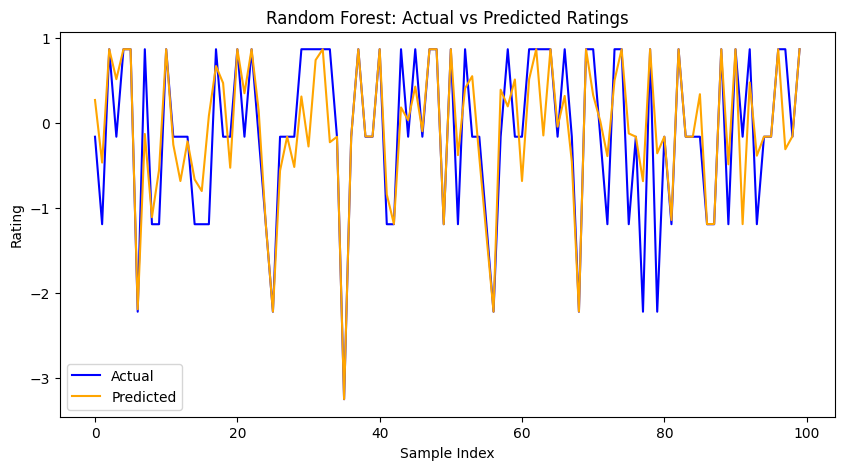

In [ ]:
# Line plot for first 100 samples

plt.figure(figsize=(10,5))

plt.plot(y_test_r.values[:100], label="Actual", color="blue")
plt.plot(rf_best_pred[:100], label="Predicted", color="orange")

plt.title("Random Forest: Actual vs Predicted Ratings")
plt.xlabel("Sample Index")
plt.ylabel("Rating")

plt.legend()
plt.show()

**Insight**

- The predicted values closely follow the actual ratings for most samples.

- Small gaps between the lines indicate good prediction accuracy.

- Some sharp peaks and drops are not perfectly captured, showing difficulty with extreme values.

Conclusion:
The Random Forest model performs well overall but can be further improved for rare or unusual cases.

Average Error Plot

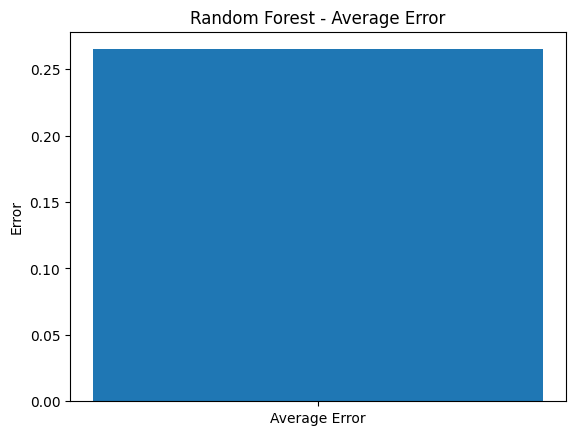

Average Error: 0.2649246469200955


In [ ]:
# Average absolute error

rf_errors = abs(y_test_r - rf_best_pred)

avg_rf_error = rf_errors.mean()

plt.bar(["Average Error"], [avg_rf_error])

plt.title("Random Forest - Average Error")
plt.ylabel("Error")

plt.show()

print("Average Error:", avg_rf_error)

**Insight**

- The average prediction error is about 0.26, which is relatively low.

- This shows that the model’s predictions are usually close to the actual ratings.

- A low error value indicates stable and reliable performance.

Conclusion:
The Random Forest model provides accurate predictions on average and is suitable for rating prediction tasks.

Error Distribution plotting

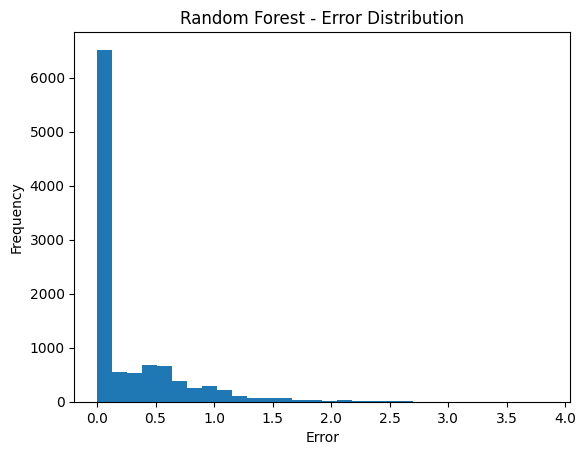

In [ ]:
# Error distribution

plt.hist(rf_errors, bins=30)

plt.title("Random Forest - Error Distribution")
plt.xlabel("Error")
plt.ylabel("Frequency")

plt.show()

**Insight**

- Most prediction errors are clustered close to 0, indicating high accuracy for most samples.

- The high bar near zero shows strong consistency in predictions.

- A small number of cases have larger errors, forming a right-side tail.

- These represent difficult or unusual observations.

Conclusion:
The Random Forest model performs well for most data points, but reducing outliers can further improve accuracy.

#### **MODEL 3: Gradient Boosting Regression**

Build, Train, Predict, Evaluate (Without Tuning)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import joblib
import matplotlib.pyplot as plt

# Build model (default settings)

gbr_model = GradientBoostingRegressor(
    random_state=42
)

# Train
gbr_model.fit(X_train_r, y_train_r)

# Predict
gbr_pred = gbr_model.predict(X_test_r)

# Evaluate
gbr_mse = mean_squared_error(y_test_r, gbr_pred)
gbr_r2 = r2_score(y_test_r, gbr_pred)

print("Gradient Boosting (Without Tuning)")
print("MSE:", gbr_mse)
print("R2 Score:", gbr_r2)

# Store metrics
regression_metrics.append([
    "Gradient Boosting (Default)", gbr_mse, gbr_r2
])

Gradient Boosting (Without Tuning)
MSE: 0.25385351701003234
R2 Score: 0.7450316957750498


Hyperparameter Tuning

In [ ]:
# Parameter grid

gbr_params = {
    "n_estimators": [100, 200],
    "learning_rate": [0.05, 0.1],
    "max_depth": [3, 5],
    "subsample": [0.8, 1.0]
}

# GridSearch

gbr_grid = GridSearchCV(
    GradientBoostingRegressor(random_state=42),
    gbr_params,
    cv=3,
    scoring="r2",
    n_jobs=-1
)

gbr_grid.fit(X_train_r, y_train_r)

print("Best Parameters:")
print(gbr_grid.best_params_)

Best Parameters:
{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}


Train Model (After Tuning)

In [ ]:
# Train tuned model

gbr_best = gbr_grid.best_estimator_

gbr_best.fit(X_train_r, y_train_r)

# Predict
gbr_best_pred = gbr_best.predict(X_test_r)

# Evaluate
gbr_best_mse = mean_squared_error(y_test_r, gbr_best_pred)
gbr_best_r2 = r2_score(y_test_r, gbr_best_pred)

print("Gradient Boosting (Tuned)")
print("MSE:", gbr_best_mse)
print("R2 Score:", gbr_best_r2)

# Store tuned metrics
regression_metrics.append([
    "Gradient Boosting (Tuned)", gbr_best_mse, gbr_best_r2
])

Gradient Boosting (Tuned)
MSE: 0.2535555825773575
R2 Score: 0.7453309385744564


**Insight**

- After hyperparameter tuning, MSE slightly decreased and R² slightly improved, showing small performance improvement.

- The tuned model fits the data better than the untuned version, but the gain is not very large.

- This means Gradient Boosting was already strong, and tuning helped fine-tune it further.

Conclusion:
Gradient Boosting is a high-performing model and is suitable for final prediction, especially after tuning.

Save Tuned Model

In [ ]:
# Save model

joblib.dump(gbr_best, MODELS_DIR/"gradient_boosting_regression.pkl")
rf_best


print("Gradient Boosting Model Saved")

Gradient Boosting Model Saved


Performance Visualization

Actual vs Predicted Rating

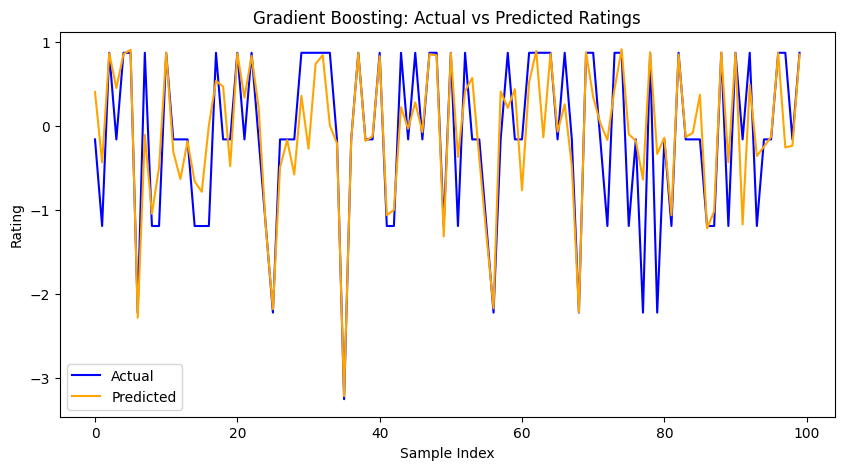

In [ ]:
# Plot first 100 samples

plt.figure(figsize=(10,5))

plt.plot(y_test_r.values[:100], label="Actual", color="blue")
plt.plot(gbr_best_pred[:100], label="Predicted", color="orange")

plt.title("Gradient Boosting: Actual vs Predicted Ratings")
plt.xlabel("Sample Index")
plt.ylabel("Rating")

plt.legend()
plt.show()

**Insight**

- The predicted line closely follows the actual line, showing good learning.

- Most peaks and drops are captured correctly by the model.

- Only a few points show noticeable errors.

Conclusion:
Gradient Boosting provides stable and accurate predictions and generalizes well on unseen data.

Average Error Plot

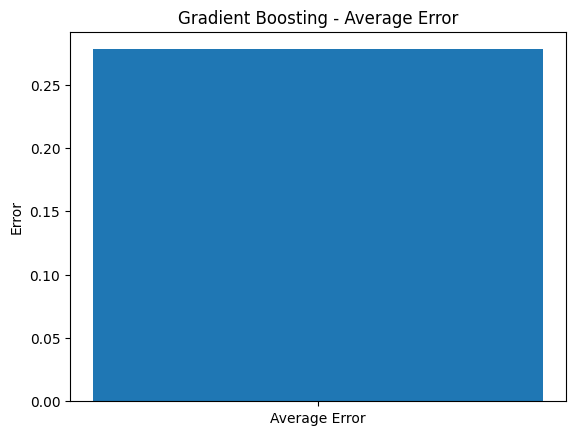

Average Error: 0.2778040089978073


In [ ]:
# Average error

gbr_errors = abs(y_test_r - gbr_best_pred)

avg_gbr_error = gbr_errors.mean()

plt.bar(["Average Error"], [avg_gbr_error])

plt.title("Gradient Boosting - Average Error")
plt.ylabel("Error")

plt.show()

print("Average Error:", avg_gbr_error)

**Insight**

- The average prediction error is around 0.28, which is low.

- This shows the model’s predictions are close to actual ratings.

- Errors are consistent, with no major instability.

Conclusion:
Gradient Boosting gives reliable and accurate predictions with controlled error, making it suitable for final deployment.

Error Distribution plotting

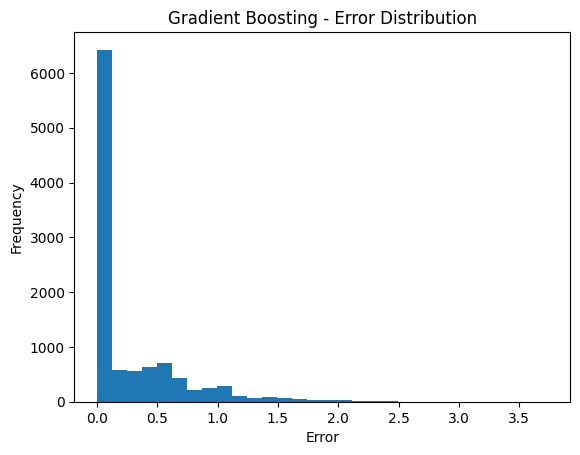

In [ ]:
# Error distribution

plt.hist(gbr_errors, bins=30)

plt.title("Gradient Boosting - Error Distribution")
plt.xlabel("Error")
plt.ylabel("Frequency")

plt.show()

**Insight**

- Most prediction errors are close to 0, showing high accuracy.

- Very few cases have large errors (>1.5).

- The distribution is right-skewed, meaning most predictions are reliable.

Conclusion:
Gradient Boosting produces stable and precise predictions with only a small number of large mistakes, making it a strong model for rating prediction.

#### Save All Regression Metrics to CSV

In [ ]:
import pandas as pd

# Create DataFrame from stored metrics
regression_results_df = pd.DataFrame(
    regression_metrics,
    columns=["Model", "MSE", "R2_Score"]
)

# Display results
display(regression_results_df)

# Save to CSV
regression_results_df.to_csv(REPORTS_DIR/"regression_model_comparison.csv", index=False)

print("✅ Regression model metrics saved to 'regression_model_comparison.csv'")

,Model,MSE,R2_Score
0,Linear Regression,0.266056,0.732775
1,Random Forest (Default),0.309226,0.689416
2,Random Forest (Tuned),0.256921,0.741951
3,Gradient Boosting (Default),0.253854,0.745032
4,Gradient Boosting (Tuned),0.253556,0.745331


✅ Regression model metrics saved to 'regression_model_comparison.csv'


###  Classification Models – Visit Mode Prediction
🎯 Objective

The goal of this phase is to predict the Visit Mode (Business, Family, Couples, Friends, etc.) of users based on their demographics, travel history, and attraction features.

Models Used:

We use the following three classification models:

- Logistic Regression

- Random Forest Classifier

- Gradient Boosting Classifier
- LightGBM Classifier

- XGBoost Classifier

Prepare Classification Dataset

In [ ]:
print(classification_df.columns)

Index(['VisitYear', 'VisitMonth', 'Continent', 'RegionId', 'CountryId',
       'CityId', 'AttractionId', 'AttractionType', 'Attraction_Popularity',
       'Visit_Frequency', 'User_Experience', 'Season', 'VisitMode'],
      dtype='object')


In [ ]:
from sklearn.model_selection import train_test_split

X_c = classification_df.drop("VisitMode", axis=1)
y_c = classification_df["VisitMode"]

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_c,
    y_c,
    test_size=0.2,
    random_state=42,
    stratify=y_c
)

print("✅ Train-test split completed")

✅ Train-test split completed


Initialize Metrics Storage

In [ ]:
classification_metrics = []

#### **MODEL 1: Logistic Regression**

Build Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=1000)

print("✅ Logistic Regression initialized")

✅ Logistic Regression initialized


Train Model

In [ ]:
log_model.fit(X_train_c, y_train_c)

print("✅ Logistic Regression trained")

✅ Logistic Regression trained


Make Predictions

In [ ]:
log_pred = log_model.predict(X_test_c)

Evaluate Model

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

log_acc = accuracy_score(y_test_c, log_pred)

print("Accuracy:", log_acc)
print("\nClassification Report:\n", classification_report(y_test_c, log_pred))

classification_metrics.append([
    "Logistic Regression",
    log_acc
])

Accuracy: 0.43591682419659733

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       125
           1       0.46      0.78      0.58      4321
           2       0.40      0.35      0.38      3042
           3       0.31      0.07      0.12      2188
           4       0.00      0.00      0.00       904

    accuracy                           0.44     10580
   macro avg       0.23      0.24      0.21     10580
weighted avg       0.37      0.44      0.37     10580



Confusion Matrix

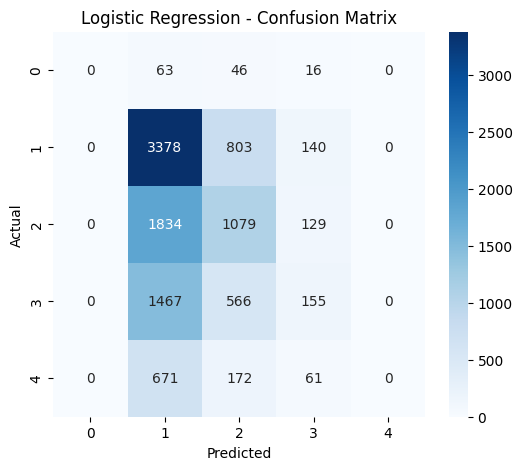

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_c, log_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.show()

Insight:
The model predicts Class 1 most accurately, but it often confuses neighboring classes (especially 2 and 3), showing moderate class overlap. Overall, performance is good, but multi-class separation needs improvement.

Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "C": [0.01, 0.1, 1, 10],
    "solver": ["lbfgs", "liblinear"]
}

grid_log = GridSearchCV(
    LogisticRegression(max_iter=1000),
    param_grid,
    cv=3,
    scoring="accuracy"
)

grid_log.fit(X_train_c, y_train_c)

best_log = grid_log.best_estimator_

print("Best Parameters:", grid_log.best_params_)

Best Parameters: {'C': 1, 'solver': 'lbfgs'}


Evaluate Tuned Model

In [ ]:
log_tuned_pred = best_log.predict(X_test_c)

log_tuned_acc = accuracy_score(y_test_c, log_tuned_pred)

log_tuned_report = classification_report(
    y_test_c,
    log_tuned_pred,
    output_dict=True
)

classification_metrics.append([
    "Logistic Regression (Tuned)",
    log_tuned_acc,
    log_tuned_report["weighted avg"]["precision"],
    log_tuned_report["weighted avg"]["recall"],
    log_tuned_report["weighted avg"]["f1-score"]
])

print("✅ Logistic Regression Tuned metrics saved")


✅ Logistic Regression Tuned metrics saved


Saving The Model

In [ ]:
import joblib

joblib.dump(best_log, MODELS_DIR/"logistic_regression.pkl")

print("✅ Logistic Regression model saved")

✅ Logistic Regression model saved


**Insight:**

- The Logistic Regression model achieves about 43.6% accuracy, showing average performance.

- It predicts Class 1 reasonably well but performs poorly on Class 0 and Class 4, indicating difficulty in handling minority classes.

- This shows the model is biased toward majority classes and needs better features or more advanced models.

- Both baseline and tuned models achieved ~43.6% accuracy, meaning hyperparameter tuning did not improve performance. Therefore, Logistic Regression is limited for this problem, and more complex models are required.

#### **MODEL 2: Random Forest Classifier**

Build The Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42)

print("✅ Random Forest initialized")

✅ Random Forest initialized


Train Model

In [ ]:
rf_clf.fit(X_train_c, y_train_c)

print("✅ Random Forest trained")

✅ Random Forest trained


Make Predictions

In [ ]:
rf_pred = rf_clf.predict(X_test_c)

Evaluate Model

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

rf_acc = accuracy_score(y_test_c, rf_pred)

print("Accuracy:", rf_acc)

# Print classification report
print("\nClassification Report (Random Forest):")
print(classification_report(y_test_c, rf_pred))

# Store metrics
classification_metrics.append([
    "Random Forest",
    rf_acc,
    classification_report(y_test_c, rf_pred, output_dict=True)
])

Accuracy: 0.48667296786389413

Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.40      0.18      0.25       125
           1       0.53      0.64      0.58      4321
           2       0.49      0.48      0.49      3042
           3       0.38      0.32      0.35      2188
           4       0.39      0.23      0.29       904

    accuracy                           0.49     10580
   macro avg       0.44      0.37      0.39     10580
weighted avg       0.48      0.49      0.48     10580



Confusion Matrix (Before Tuning)

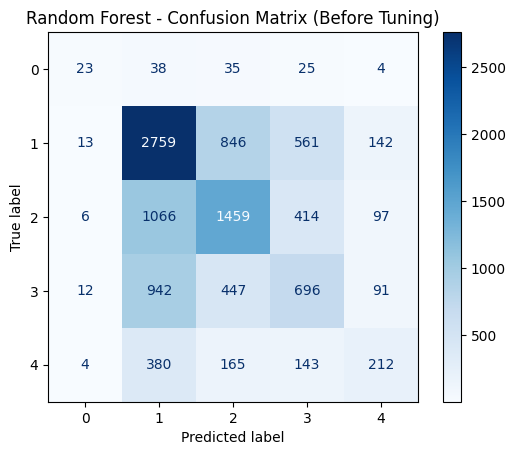

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion Matrix (Before Tuning)
rf_cm = confusion_matrix(y_test_c, rf_pred)

disp_rf = ConfusionMatrixDisplay(
    confusion_matrix=rf_cm
)

disp_rf.plot(cmap="Blues")

plt.title("Random Forest - Confusion Matrix (Before Tuning)")
plt.show()

Insight:
The Random Forest model predicts Class 1 and Class 2 reasonably well, showing better performance than Logistic Regression. However, it still shows significant confusion between neighboring classes, especially among Classes 1, 2, and 3, indicating overlapping patterns in the data.

Hyperparameter Tuning

In [ ]:
rf_params = {
    "n_estimators": [100, 200],
    "max_depth": [10, 20, None]
}

grid_rf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    rf_params,
    cv=3,
    scoring="accuracy"
)

grid_rf.fit(X_train_c, y_train_c)

best_rf = grid_rf.best_estimator_

print("Best Parameters:", grid_rf.best_params_)

Best Parameters: {'max_depth': 20, 'n_estimators': 200}


Evaluate Tuned Model

In [ ]:
rf_tuned_pred = best_rf.predict(X_test_c)

rf_tuned_acc = accuracy_score(y_test_c, rf_tuned_pred)

rf_tuned_report = classification_report(
    y_test_c,
    rf_tuned_pred,
    output_dict=True
)

classification_metrics.append([
    "Random Forest (Tuned)",
    rf_tuned_acc,
    rf_tuned_report["weighted avg"]["precision"],
    rf_tuned_report["weighted avg"]["recall"],
    rf_tuned_report["weighted avg"]["f1-score"]
])

print("✅ Random Forest Tuned metrics saved")


✅ Random Forest Tuned metrics saved


Confusion Matrix (After Tuning)

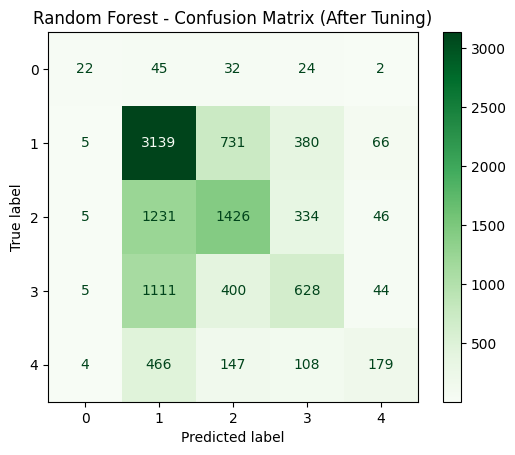

In [ ]:
# Confusion Matrix (After Tuning)
rf_tuned_cm = confusion_matrix(y_test_c, rf_tuned_pred)

disp_rf_tuned = ConfusionMatrixDisplay(
    confusion_matrix=rf_tuned_cm
)

disp_rf_tuned.plot(cmap="Greens")

plt.title("Random Forest - Confusion Matrix (After Tuning)")
plt.show()

After hyperparameter tuning, the Random Forest model shows improved predictions for Class 1 and reduced misclassification compared to the baseline. However, confusion among Classes 2 and 3 still remains, indicating limited improvement for minority and overlapping classes.

Saving The Model

In [ ]:
joblib.dump(best_rf, MODELS_DIR/"random_forest_clf.pkl")

print("✅ Random Forest model saved")

✅ Random Forest model saved


**Insight:**

- The Random Forest model achieved about 48.7% accuracy in the baseline version, showing better performance than Logistic Regression.

- After hyperparameter tuning, accuracy improved to about 50.9%, indicating that tuning helped enhance model performance.

- The model predicts Class 1 and Class 2 relatively well but still struggles with minority classes like Class 0 and Class 4.

- This shows that Random Forest handles complex patterns better than Logistic Regression, but class imbalance and feature limitations still affect overall performance.

#### **MODEL 3: Gradient Boosting Classifier**

Build The Model

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(random_state=42)

print("✅ Gradient Boosting initialized")

✅ Gradient Boosting initialized


Train Model

In [ ]:
gb_clf.fit(X_train_c, y_train_c)

print("✅ Gradient Boosting trained")

✅ Gradient Boosting trained


Make Predictions

In [ ]:
gb_pred = gb_clf.predict(X_test_c)

Evaluate Model

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

gb_acc = accuracy_score(y_test_c, gb_pred)

print("Accuracy:", gb_acc)

# Print classification report
print("\nClassification Report (Gradient Boosting):")
print(classification_report(y_test_c, gb_pred))

# Store metrics
classification_metrics.append([
    "Gradient Boosting",
    gb_acc,
    classification_report(y_test_c, gb_pred, output_dict=True)
])

Accuracy: 0.4783553875236295

Classification Report (Gradient Boosting):
              precision    recall  f1-score   support

           0       0.67      0.03      0.06       125
           1       0.48      0.83      0.61      4321
           2       0.52      0.37      0.43      3042
           3       0.38      0.15      0.21      2188
           4       0.59      0.02      0.04       904

    accuracy                           0.48     10580
   macro avg       0.53      0.28      0.27     10580
weighted avg       0.48      0.48      0.42     10580



Confusion Matrix (Before Tuning)

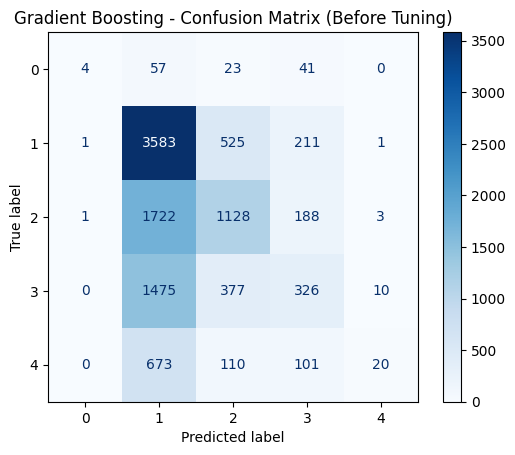

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion Matrix - Before Tuning
gb_cm = confusion_matrix(y_test_c, gb_pred)

disp = ConfusionMatrixDisplay(
    confusion_matrix=gb_cm
)

disp.plot(cmap="Blues")

plt.title("Gradient Boosting - Confusion Matrix (Before Tuning)")
plt.show()

Insight:

The model predicts Class 1 very well, with a high number of correct classifications, showing strong performance on the majority class.

However, it shows significant confusion between Classes 2 and 3, and performs poorly on minority classes (0 and 4), indicating class imbalance issues and limited generalization before tuning.

Hyperparameter Tuning

In [ ]:
gb_params = {
    "n_estimators": [100, 200],
    "learning_rate": [0.05, 0.1],
    "max_depth": [3, 5]
}

grid_gb = GridSearchCV(
    GradientBoostingClassifier(random_state=42),
    gb_params,
    cv=3,
    scoring="accuracy"
)

grid_gb.fit(X_train_c, y_train_c)

best_gb = grid_gb.best_estimator_

print("Best Parameters:", grid_gb.best_params_)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}


Evaluate Tuned Model

In [ ]:
gb_tuned_pred = best_gb.predict(X_test_c)

gb_tuned_acc = accuracy_score(y_test_c, gb_tuned_pred)

gb_tuned_report = classification_report(
    y_test_c,
    gb_tuned_pred,
    output_dict=True
)

classification_metrics.append([
    "Gradient Boosting (Tuned)",
    gb_tuned_acc,
    gb_tuned_report["weighted avg"]["precision"],
    gb_tuned_report["weighted avg"]["recall"],
    gb_tuned_report["weighted avg"]["f1-score"]
])

print("✅ Gradient Boosting Tuned metrics saved")

✅ Gradient Boosting Tuned metrics saved


Confusion Matrix (After Tuning)

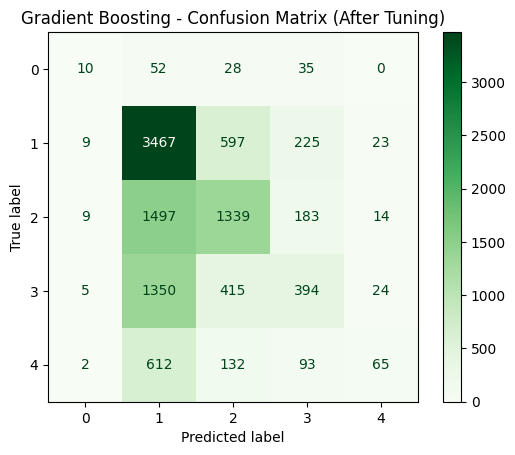

In [ ]:
# Confusion Matrix - After Tuning
gb_tuned_cm = confusion_matrix(y_test_c, gb_tuned_pred)

disp = ConfusionMatrixDisplay(
    confusion_matrix=gb_tuned_cm
)

disp.plot(cmap="Greens")

plt.title("Gradient Boosting - Confusion Matrix (After Tuning)")
plt.show()

After tuning, the model shows improved prediction for Classes 2 and 3, with more correct classifications than before.

Performance on Class 1 remains strong, and Class 4 slightly improves, but minority classes are still challenging.

Overall, hyperparameter tuning helped reduce misclassification and improved balance, but class imbalance still affects performance.

Saving The Model

In [ ]:
joblib.dump(best_gb, MODELS_DIR/"gradient_boosting_clf.pkl")

print("✅ Gradient Boosting model saved")

✅ Gradient Boosting model saved


**Insight:**

- The baseline Gradient Boosting model achieved about 47.8% accuracy, showing better performance than Logistic Regression.

- It predicts Class 1 reasonably well, but still struggles with minority classes like Class 0 and Class 4.

- After hyperparameter tuning, accuracy improved slightly to ~49.9%, indicating moderate improvement.

- Although tuning helped, class imbalance remains a major issue, and the model is still biased toward majority classes.

- Overall, Gradient Boosting performs better than Logistic Regression but is slightly weaker than tuned Random Forest, suggesting that ensemble models are more suitable for this problem.

#### **MODEL 4: XGBoost Classifier**

Build The Model

In [ ]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(
    random_state=42,
    use_label_encoder=False,
    eval_metric="mlogloss"
)

print("✅ XGBoost initialized")

✅ XGBoost initialized


Train Model

In [ ]:
xgb_clf.fit(X_train_c, y_train_c)

print("✅ XGBoost trained")

✅ XGBoost trained


Make Predictions

In [ ]:
xgb_pred = xgb_clf.predict(X_test_c)

Evaluate Model

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

xgb_acc = accuracy_score(y_test_c, xgb_pred)

print("Accuracy:", xgb_acc)

# Print classification report
print("\nClassification Report (XGBoost):")
print(classification_report(y_test_c, xgb_pred))

# Store metrics
classification_metrics.append([
    "XGBoost",
    xgb_acc,
    classification_report(y_test_c, xgb_pred, output_dict=True)
])

Accuracy: 0.5014177693761814

Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       0.40      0.08      0.13       125
           1       0.50      0.79      0.61      4321
           2       0.53      0.46      0.49      3042
           3       0.43      0.18      0.26      2188
           4       0.59      0.08      0.15       904

    accuracy                           0.50     10580
   macro avg       0.49      0.32      0.33     10580
weighted avg       0.50      0.50      0.46     10580



Confusion Matrix (Before Tuning)

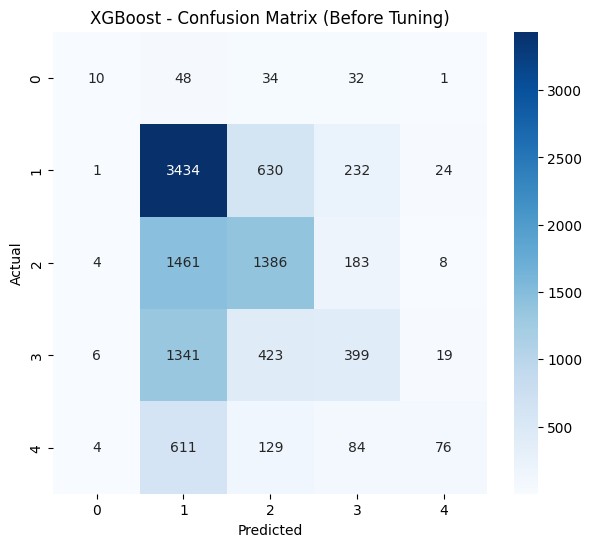

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm_xgb = confusion_matrix(y_test_c, xgb_pred)

plt.figure(figsize=(7,6))
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Blues")

plt.title("XGBoost - Confusion Matrix (Before Tuning)")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.show()

Insight:

The model predicts Class 1 very well (high correct predictions), showing strong performance on the majority class.

However, it frequently misclassifies Classes 2 and 3 as Class 1, and performs poorly on Class 0 and Class 4, indicating class imbalance and limited learning for minority classes.

Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

xgb_params = {
    "n_estimators": [100, 200],
    "max_depth": [10, 20, None]
}

grid_xgb = GridSearchCV(
    XGBClassifier(
        random_state=42),
    xgb_params,
    cv=3,
    scoring="accuracy"
)


grid_xgb.fit(X_train_c, y_train_c)

best_xgb = grid_xgb.best_estimator_

print("Best Params:", grid_xgb.best_params_)

Best Params: {'max_depth': 10, 'n_estimators': 100}


Evaluate Tuned Model

In [ ]:
xgb_tuned_pred = best_xgb.predict(X_test_c)

xgb_tuned_acc = accuracy_score(y_test_c, xgb_tuned_pred)

xgb_tuned_report = classification_report(
    y_test_c,
    xgb_tuned_pred,
    output_dict=True
)

classification_metrics.append([
    "XGBoost (Tuned)",
    xgb_tuned_acc,
    xgb_tuned_report["weighted avg"]["precision"],
    xgb_tuned_report["weighted avg"]["recall"],
    xgb_tuned_report["weighted avg"]["f1-score"]
])

print("✅ XGBoost Tuned metrics saved")

✅ XGBoost Tuned metrics saved


Confusion Matrix (After Tuning)

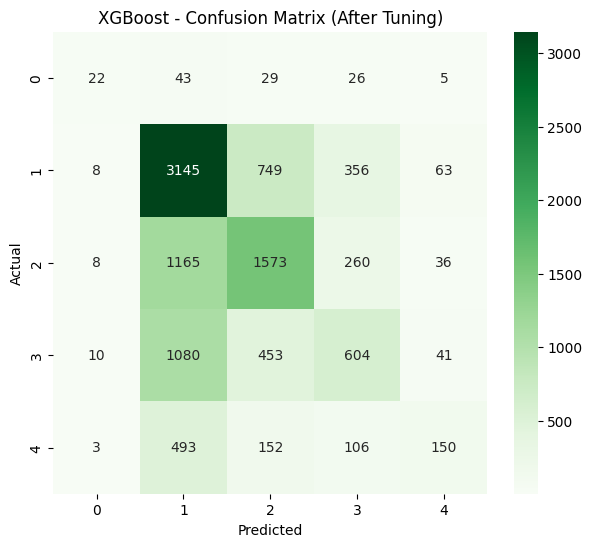

In [ ]:
cm_xgb_tuned = confusion_matrix(y_test_c, xgb_tuned_pred)

plt.figure(figsize=(7,6))
sns.heatmap(cm_xgb_tuned, annot=True, fmt="d", cmap="Greens")

plt.title("XGBoost - Confusion Matrix (After Tuning)")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.show()

After tuning, the model shows improved performance on Classes 2, 3, and 4, with more correct predictions than before.

However, Class 1 still dominates predictions, and confusion with neighboring classes remains, indicating that tuning helped slightly but class imbalance is still a major challenge.

Saving The Model

In [ ]:
import joblib

joblib.dump(best_xgb, MODELS_DIR / "xgboost_clf.pkl")

print("✅ XGBoost model saved")

✅ XGBoost model saved


**Insight:**

- The XGBoost model achieves around 50.1% accuracy, which is better than Logistic Regression and comparable to Random Forest and Gradient Boosting.

- It predicts Class 1 well (high recall and F1-score) but still struggles with minority classes (0 and 4).

- After hyperparameter tuning, accuracy improves to ~51.9%, showing that tuning helps XGBoost learn better patterns.

- Overall, XGBoost is one of the best-performing models so far, but class imbalance still affects its performance.

#### **MODEL 5: LightGBM Classifier**


Build The Model

In [ ]:
from lightgbm import LGBMClassifier

lgb_clf = LGBMClassifier(random_state=42)

print("✅ LightGBM initialized")

✅ LightGBM initialized


Train Model

In [ ]:
lgb_clf.fit(X_train_c, y_train_c)

print("✅ LightGBM trained")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003135 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 545
[LightGBM] [Info] Number of data points in the train set: 42318, number of used features: 12
[LightGBM] [Info] Start training from score -4.442368
[LightGBM] [Info] Start training from score -0.895373
[LightGBM] [Info] Start training from score -1.246403
[LightGBM] [Info] Start training from score -1.575930
[LightGBM] [Info] Start training from score -2.460121
✅ LightGBM trained


Make Predictions

In [ ]:
lgb_pred = lgb_clf.predict(X_test_c)

Evaluate Model

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Accuracy
lgb_acc = accuracy_score(y_test_c, lgb_pred)
print("Accuracy:", lgb_acc)

# Classification Report
print("\nClassification Report (LightGBM):")
print(classification_report(y_test_c, lgb_pred))

# Store Metrics
classification_metrics.append([
    "LightGBM",
    lgb_acc
])

Accuracy: 0.49924385633270324

Classification Report (LightGBM):
              precision    recall  f1-score   support

           0       0.50      0.09      0.15       125
           1       0.49      0.82      0.61      4321
           2       0.54      0.42      0.47      3042
           3       0.43      0.18      0.25      2188
           4       0.65      0.07      0.13       904

    accuracy                           0.50     10580
   macro avg       0.52      0.32      0.32     10580
weighted avg       0.51      0.50      0.45     10580



Confusion Matrix (Before Tuning)

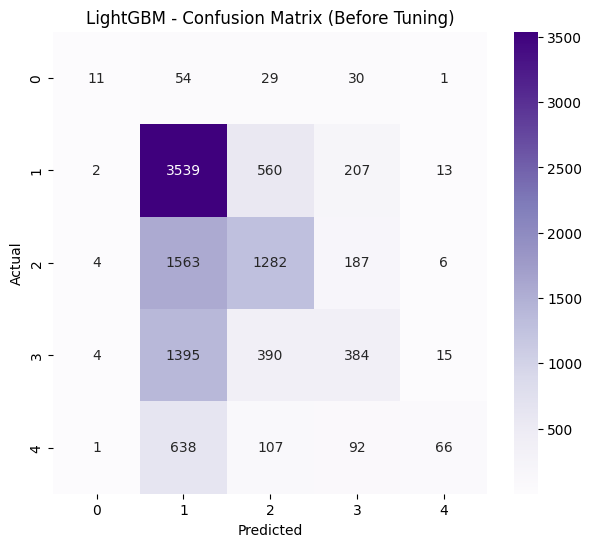

In [ ]:
cm_lgb = confusion_matrix(y_test_c, lgb_pred)

plt.figure(figsize=(7,6))
sns.heatmap(cm_lgb, annot=True, fmt="d", cmap="Purples")

plt.title("LightGBM - Confusion Matrix (Before Tuning)")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.show()

Insight:

The model predicts Class 1 very well, showing strong performance on the majority class.

However, it still misclassifies many samples from Classes 2, 3, and 4 into Class 1, indicating class imbalance bias and weak minority class learning.

Hyperparameter Tuning

In [ ]:
lgb_params = {
    "n_estimators": [100, 200],
    "max_depth": [5, 10],
    "learning_rate": [0.05, 0.1]
}

grid_lgb = GridSearchCV(
    LGBMClassifier(random_state=42),
    lgb_params,
    cv=3,
    scoring="accuracy"
)




grid_lgb.fit(X_train_c, y_train_c)

best_lgb = grid_lgb.best_estimator_

print("Best Params:", grid_lgb.best_params_)

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

Evaluate Tuned Model

In [ ]:
lgb_tuned_pred = best_lgb.predict(X_test_c)

lgb_tuned_acc = accuracy_score(y_test_c, lgb_tuned_pred)

lgb_tuned_report = classification_report(
    y_test_c,
    lgb_tuned_pred,
    output_dict=True
)

classification_metrics.append([
    "LightGBM (Tuned)",
    lgb_tuned_acc,
    lgb_tuned_report["weighted avg"]["precision"],
    lgb_tuned_report["weighted avg"]["recall"],
    lgb_tuned_report["weighted avg"]["f1-score"]
])

print("✅ LightGBM Tuned metrics saved")

✅ LightGBM Tuned metrics saved


Confusion Matrix (After Tuning)

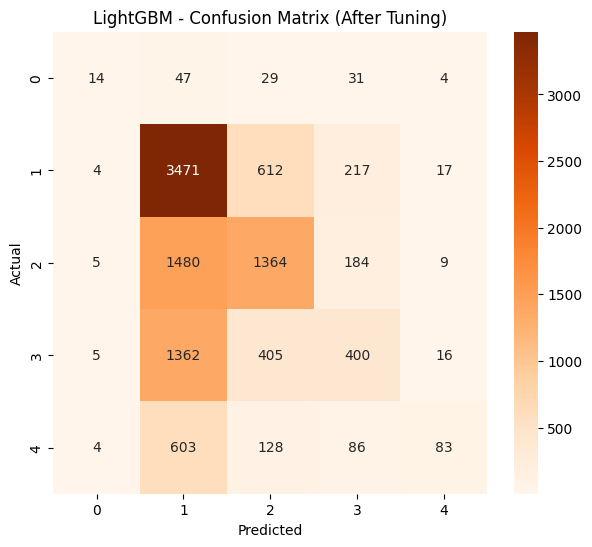

In [ ]:
cm_lgb_tuned = confusion_matrix(y_test_c, lgb_tuned_pred)

plt.figure(figsize=(7,6))
sns.heatmap(cm_lgb_tuned, annot=True, fmt="d", cmap="Oranges")

plt.title("LightGBM - Confusion Matrix (After Tuning)")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.show()

Hyperparameter tuning slightly improves predictions for Classes 2 and 3, showing better balance than before.

However, the model is still strongly biased toward Class 1, and minority classes (0 and 4) remain poorly predicted, so overall improvement is limited.

Saving The Model

In [ ]:
joblib.dump(best_lgb, MODELS_DIR / "lightgbm_clf.pkl")

print("✅ LightGBM model saved")

✅ LightGBM model saved


**Insight:**

- The LightGBM model achieves about 50% accuracy, which is better than Logistic Regression and similar to Random Forest and XGBoost.

- It predicts Class 1 very well, but performs poorly on minority classes (Class 0 and Class 4).

- After tuning, accuracy improved slightly to ~50.4%, showing small but positive improvement.

- Overall, LightGBM is a strong model for majority classes, but still needs better handling of class imbalance for further improvement.

### Saving the All Metrics

In [ ]:
import pandas as pd

# Create DataFrame with full metrics
clf_results_df = pd.DataFrame(
    classification_metrics,
    columns=[
        "Model",
        "Accuracy",
        "Precision_Weighted",
        "Recall_Weighted",
        "F1_Weighted"
    ]
)


clf_results_df = clf_results_df[
    clf_results_df["Model"].str.contains("Tuned")
].reset_index(drop=True)


# Display results
display(clf_results_df)

# Save to reports folder
clf_results_df.to_csv(
    REPORTS_DIR / "classification_model_comparison.csv",
    index=False
)

print("✅ Full classification model comparison saved")


,Model,Accuracy,Precision_Weighted,Recall_Weighted,F1_Weighted
0,Logistic Regression (Tuned),0.435917,0.366458,0.435917,0.367693
1,Random Forest (Tuned),0.509830,0.503644,0.509830,0.489251
2,Gradient Boosting (Tuned),0.498582,0.49131,0.498582,0.453823
3,XGBoost (Tuned),0.519282,0.510684,0.519282,0.496411
4,LightGBM (Tuned),0.503970,0.50837,0.503970,0.460929


✅ Full classification model comparison saved


## **MODEL COMPARISON & BEST MODEL SELECTION**




In [158]:
import pandas as pd
import matplotlib.pyplot as plt
import json
from pathlib import Path

Defining the paths

In [159]:
REPORTS_DIR = PROJECT_ROOT / "reports"
MODELS_DIR = PROJECT_ROOT / "models"

BEST_MODEL_DIR = PROJECT_ROOT / "best_models"
BEST_MODEL_DIR.mkdir(exist_ok=True)

print("Reports:", REPORTS_DIR)
print("Models:", MODELS_DIR)
print("Best Models:", BEST_MODEL_DIR)

Reports: /content/drive/MyDrive/Tourism-Experience-Analytics/reports
Models: /content/drive/MyDrive/Tourism-Experience-Analytics/models
Best Models: /content/drive/MyDrive/Tourism-Experience-Analytics/best_models


#### Regression Comparison

Load Regression Comparison CSV

In [160]:
reg_df = pd.read_csv(
    REPORTS_DIR / "regression_model_comparison.csv"
)

display(reg_df)

print("✅ Regression metrics loaded")

,Model,MSE,R2_Score
0,Linear Regression,0.266056,0.732775
1,Random Forest (Default),0.309226,0.689416
2,Random Forest (Tuned),0.256921,0.741951
3,Gradient Boosting (Default),0.253854,0.745032
4,Gradient Boosting (Tuned),0.253556,0.745331


✅ Regression metrics loaded


Visualize Regression Metrics

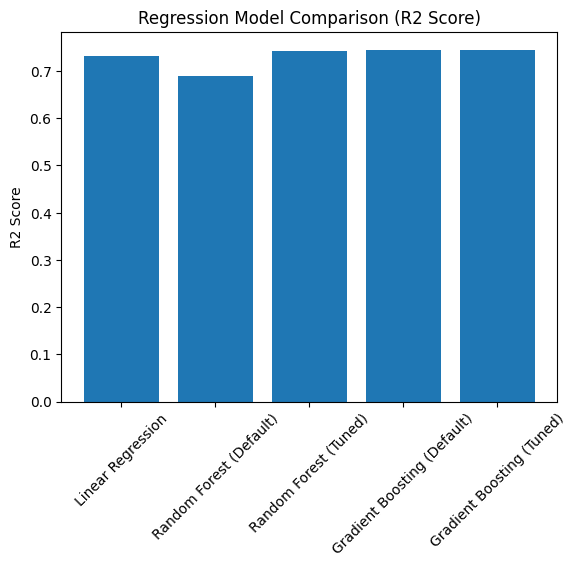

In [161]:

plt.bar(reg_df["Model"], reg_df["R2_Score"])

plt.xticks(rotation=45)
plt.title("Regression Model Comparison (R2 Score)")
plt.ylabel("R2 Score")

plt.show()

Select Best Regression Model

In [162]:
best_reg = reg_df.loc[
    reg_df["R2_Score"].idxmax()
]

best_reg_model = best_reg["Model"]
best_reg_r2 = best_reg["R2_Score"]

print("Best Regression Model:", best_reg_model)
print("Best R2 Score:", best_reg_r2)

Best Regression Model: Gradient Boosting (Tuned)
Best R2 Score: 0.7453309385744564


Save Best Regression Model Info

In [163]:
MODEL_FILE_MAP = {

    # Regression Models
    "Linear Regression": "linear_regression.pkl",
    "Random Forest (Tuned)": "random_forest_regression.pkl",
    "Gradient Boosting (Tuned)": "gradient_boosting_regression.pkl",

    # Classification Models
    "Logistic Regression (Tuned)": "logistic_regression_clf.pkl",
    "Random Forest (Tuned)": "random_forest_clf.pkl",
    "Gradient Boosting (Tuned)": "gradient_boosting_clf.pkl",
    "XGBoost (Tuned)": "xgboost_clf.pkl",
    "LightGBM (Tuned)": "lightgbm_clf.pkl"
}

print("✅ Model file mapping loaded")

✅ Model file mapping loaded


In [164]:
import json

reg_file = MODEL_FILE_MAP[best_reg_model]

best_regression_info = {
    "task": "regression",
    "model_name": best_reg_model,
    "model_path": f"./models/{reg_file}",
    "metric": "R2",
    "score": best_reg_r2
}

with open(REPORTS_DIR / "best_regression_model.json", "w") as f:
    json.dump(best_regression_info, f, indent=4)

print("✅ Best regression model JSON saved")

✅ Best regression model JSON saved


#### **Classification Comparison**

Load Classification Comparison CSV

In [165]:
clf_df = pd.read_csv(
    REPORTS_DIR / "classification_model_comparison.csv"
)

display(clf_df)

print("✅ Classification metrics loaded")

,Model,Accuracy,Precision_Weighted,Recall_Weighted,F1_Weighted
0,Logistic Regression (Tuned),0.435917,0.366458,0.435917,0.367693
1,Random Forest (Tuned),0.509830,0.503644,0.509830,0.489251
2,Gradient Boosting (Tuned),0.498582,0.491310,0.498582,0.453823
3,XGBoost (Tuned),0.519282,0.510684,0.519282,0.496411
4,LightGBM (Tuned),0.503970,0.508370,0.503970,0.460929


✅ Classification metrics loaded


Visualize Classification Metrics

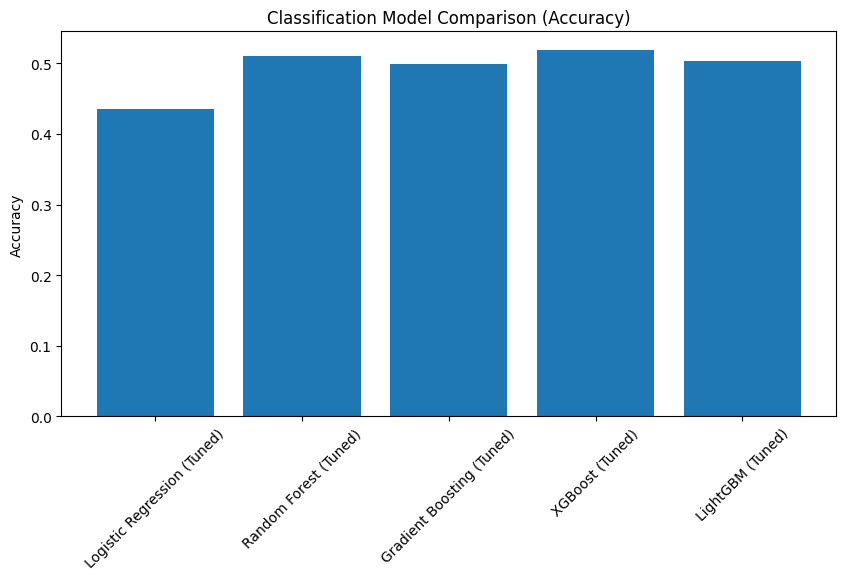

In [166]:
plt.figure(figsize=(10,5))

plt.bar(clf_df["Model"], clf_df["Accuracy"])

plt.xticks(rotation=45)
plt.title("Classification Model Comparison (Accuracy)")
plt.ylabel("Accuracy")

plt.show()

Select Best Classification Model

In [167]:
best_clf = clf_df.loc[
    clf_df["Accuracy"].idxmax()
]

best_clf_model = best_clf["Model"]
best_clf_acc = best_clf["Accuracy"]

print("Best Classification Model:", best_clf_model)
print("Best Accuracy:", best_clf_acc)

Best Classification Model: XGBoost (Tuned)
Best Accuracy: 0.5192816635160681


Save Best Classification Model Info

In [169]:
clf_file = MODEL_FILE_MAP[best_clf_model]

best_classification_info = {
    "task": "classification",
    "model_name": best_clf_model,
    "model_path": f"./models/{clf_file}",
    "metric": "Accuracy",
    "score": best_clf_acc
}

with open(REPORTS_DIR / "best_classification_model.json", "w") as f:
    json.dump(best_classification_info, f, indent=4)

print("✅ Best classification model JSON saved")

✅ Best classification model JSON saved


Verify JSON Files

In [171]:
print("Regression JSON:")
with open(REPORTS_DIR / "best_regression_model.json") as f:
    print(f.read())

print("\nClassification JSON:")
with open(REPORTS_DIR / "best_classification_model.json") as f:
    print(f.read())

Regression JSON:
{
    "task": "regression",
    "model_name": "Gradient Boosting (Tuned)",
    "model_path": "./models/gradient_boosting_clf.pkl",
    "metric": "R2",
    "score": 0.7453309385744564
}

Classification JSON:
{
    "task": "classification",
    "model_name": "XGBoost (Tuned)",
    "model_path": "./models/xgboost_clf.pkl",
    "metric": "Accuracy",
    "score": 0.5192816635160681
}


### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***